----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <u>**Google Playstore Data Analysis and Predictions**</u>

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**<u>Group 14</u>** 
---

<u>AIDI-1003-01 Capstone Term 1</u>
---

Bindya Biju (ID: 100886575)
---
Sanath Davis (ID: 100884693)
---


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## Introduction

### This is a python notebook which details the various steps and processes involved in exploring, analysing, training and testing the dataset of Google Playstore. 
### A project report is attached along with this submission.

## Minimum Requirements

### You will definitely need to have the following installed for running this notebook: 
    a) Pandas
    b) Sklearn
    c) Numpy
    d) Seaborn
    e) Matplotlib
    f) Pandas Profiling
    g) XG Boost



## Load dataset into pandas

The dataset file is named 'Google-Playstore.csv' and can be downloaded from https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps

In [1]:
import pandas as pd
dataset = pd.read_csv("Google-Playstore.csv")
dataset

App Name  \
0                                                  Gakondo   
1                                      Ampere Battery Info   
2                                                   Vibook   
3        Smart City Trichy Public Service Vehicles 17UC...   
4                                                  GROW.me   
...                                                    ...   
2312939                                           大俠客—熱血歸來   
2312940                                         ORU Online   
2312941                                     Data Structure   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                       App Id       Category  Rating  \
0                         com.ishakwe.gakondo      Adventure     0.0   
1                  com.webserveis.batteryinfo          Tools     4.4   
2                        com.doantiepvien.crm   Productivity     0.0   
3                     cst.stJoseph.ug17ucs548  Communication     5.0   
4                        com.horodyski.grower          Tools     0.0   
...                                       ...            ...     ...   
2312939                         com.rxsj.ssjj   Role Playing     4.3   
2312940              com.threedream.oruonline      Education     0.0   
2312941  datastructure.appoworld.datastucture      Education     0.0   
2312942                     ishan.devi.suktam  Music & Audio     3.5   
2312943             com.yyazilim.biliyormusun         Trivia     5.0   

         Rating Count  Installs  Minimum Installs  Maximum Installs  Free  \
0                 0.0       10+              10.0                15  True   
1                64.0    5,000+            5000.0              7662  True   
2                 0.0       50+              50.0                58  True   
3                 5.0       10+              10.0                19  True   
4                 0.0      100+             100.0               478  True   
...               ...       ...               ...               ...   ...   
2312939       16775.0  100,000+          100000.0            337109  True   
2312940           0.0      100+             100.0               430  True   
2312941           0.0      100+             100.0               202  True   
2312942           8.0    1,000+            1000.0              2635  True   
2312943          12.0      100+             100.0               354  True   

         Price  ...                  Developer Website  \
0          0.0  ...        https://beniyizibyose.tk/#/   
1          0.0  ...    https://webserveis.netlify.app/   
2          0.0  ...                                NaN   
3          0.0  ...   http://www.climatesmarttech.com/   
4          0.0  ...        http://www.horodyski.com.pl   
...        ...  ...                                ...   
2312939    0.0  ...          http://www.4399sy.com.hk/   
2312940    0.0  ...                http://www.oru.edu/   
2312941    0.0  ...                                NaN   
2312942    0.0  ...  https://a70f78905.app-ads-txt.com   
2312943    0.0  ...                                NaN   

                      Developer Email      Released  Last Updated  \
0              jean21101999@gmail.com  Feb 26, 2020  Feb 26, 2020   
1                webserveis@gmail.com  May 21, 2020  May 06, 2021   
2                 vnacrewit@gmail.com   Aug 9, 2019  Aug 19, 2019   
3         climatesmarttech2@gmail.com  Sep 10, 2018  Oct 13, 2018   
4           rmilekhorodyski@gmail.com  Feb 21, 2020  Nov 12, 2018   
...                               ...           ...           ...   
2312939           ssjjcomhk@gmail.com           NaN  Jun 01, 2021   
2312940     3DreamDeveloper@gmail.com  Jan 17, 2018  Feb 02, 2018   
2312941  appoworld.official@gmail.com  Aug 19, 2018  Aug 19, 2018   
2312942           ruchisono@gmail.com   Aug 1, 2016  May 05, 2021   
2312943     yyazilimdevelop@gmail.com   Aug 9, 2019  Aug 19

## Feature Engineering

### Is there a term 'Free' in app name?
Code available at https://stackoverflow.com/questions/43055050/python-pandas-if-column-string-contains-word-flag

In [2]:
import numpy as np
dataset['has_free_in_app_name'] = np.where(dataset['App Name'].str.contains("Free", case=False, na=False), 1, 0)
dataset['has_free_in_app_name'].unique()

array([0, 1])

### Number of characters in app name

In [3]:
dataset['no_of_characters_in_app_name'] = dataset['App Name'].str.len()
dataset['no_of_characters_in_app_name']

0           7.0
1          19.0
2           6.0
3          50.0
4           7.0
           ... 
2312939     8.0
2312940    10.0
2312941    14.0
2312942    11.0
2312943    28.0
Name: no_of_characters_in_app_name, Length: 2312944, dtype: float64

### Released in the last two years?

In [4]:
dataset['Released']

dataset['Released'] = dataset['Released'].apply(pd.to_datetime, format='%b %d, %Y')
in_between = dataset.Released.between('01/01/2020', '31/12/2022')
dataset['released_within_one_year'] = np.where(in_between, 1, 0)

dataset['released_within_one_year']

C:\Users\Sanath Davis\AppData\Local\Temp\ipykernel_25148\2545652245.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  in_between = dataset.Released.between('01/01/2020', '31/12/2022')


0          1
1          1
2          0
3          0
4          1
          ..
2312939    0
2312940    0
2312941    0
2312942    0
2312943    0
Name: released_within_one_year, Length: 2312944, dtype: int32

## Pre Processing dataset and cleaning


### a) Remove unwanted columns

In [5]:
#axis = 1 means we are working with columns
dataset = dataset.drop(['Developer Email', 'Privacy Policy', 'Scraped Time', 'App Id', 'Minimum Installs', 'Developer Website', 'Released', 'Last Updated', 'App Name', 'Developer Id'], axis = 1)

### b) Remove rows with NAN

In [6]:
#example of rows with null or nan values
dataset["Size"].isnull().sum()

196

In [7]:
#droping nan
row_count_before_dropping_nan = len(dataset) 
dataset = dataset.dropna()
row_count_after_dropping_nan = len(dataset)
print("Following number of rows with NAN have been removed:")
print(row_count_before_dropping_nan - row_count_after_dropping_nan)

Following number of rows with NAN have been removed:
29431


### c) Number of installs converted to number from terms like '10,000+' to 10000

In [8]:
dataset.Installs

0               10+
1            5,000+
2               50+
3               10+
4              100+
             ...   
2312939    100,000+
2312940        100+
2312941        100+
2312942      1,000+
2312943        100+
Name: Installs, Length: 2283513, dtype: object

In [9]:
# formats an entry in installs column
def installs_cleaner(install):
    cleaned_install = str(install)
    cleaned_install = cleaned_install.replace(
        '+', '').replace(',', '')
    try:
        return int(cleaned_install)
    except ValueError:
        return 0


In [10]:
#view unique values in this column
dataset.Installs.value_counts()


100+               438072
1,000+             395186
10+                292873
10,000+            255233
500+               186998
50+                167742
5,000+             142685
100,000+           109681
50,000+             74942
5+                  71257
1+                  62945
1,000,000+          33505
500,000+            26902
0+                  11250
5,000,000+           6577
10,000,000+          6169
50,000,000+           823
100,000,000+          539
500,000,000+           65
1,000,000,000+         54
5,000,000,000+         14
10,000,000,000+         1
Name: Installs, dtype: int64

In [11]:
#apply the cleaner function on all rows
dataset.Installs = dataset.Installs.apply(installs_cleaner)

In [12]:
dataset.Installs

0              10
1            5000
2              50
3              10
4             100
            ...  
2312939    100000
2312940       100
2312941       100
2312942      1000
2312943       100
Name: Installs, Length: 2283513, dtype: int64

Anyways, since the 'Maximum Installs' gives us a better indication, we will use that.

### d) Clean APP SIZE convert everything to MB

In [13]:
dataset.Size

0           10M
1          2.9M
2          3.7M
3          1.8M
4          6.2M
           ... 
2312939     77M
2312940     44M
2312941     29M
2312942     10M
2312943    5.2M
Name: Size, Length: 2283513, dtype: object

In [14]:
#find the various characters in app size column
import re
k=[]
for i in dataset.Size.unique():
    j = str(i)
    res1 = " ".join(re.split("[^a-zA-Z]*", j))
    k.append(res1)
set(k)

{'  G ', '  M ', '  k ', ' V a r i e s  w i t h  d e v i c e '}

In [15]:
# removes 'Varies with device' as they are lower in number
countWithVariesWithDevice= len(dataset)
dataset = dataset[dataset['Size'] != "Varies with device"]
countWithoutVariesWithDevice = len(dataset)
print("removed the following number of rows with size as 'Varies with device'")
print(countWithVariesWithDevice - countWithoutVariesWithDevice)

removed the following number of rows with size as 'Varies with device'
52930


In [16]:
#formats an entry in Size column
#converts all sizes in KB and GB to MB for standard
#some values shown as 'Varies with device' are already removed

def size_cleaner(size):
    cleaned_size = str(size)
    cleaned_size1 = str(size)
    
    if cleaned_size == 'Varies with device':
        cleaned_size =  0
    else:
        cleaned_size = cleaned_size.replace('M', '')
        cleaned_size = cleaned_size.replace('k', '')        
        cleaned_size = cleaned_size.replace('G', '')
        cleaned_size = cleaned_size.replace(",", '')

        if 'k' in cleaned_size1:
            cleaned_size = float(cleaned_size) * 0.001
        
        if 'G' in cleaned_size1:
            cleaned_size = float(cleaned_size) * 1000
            
    return float(cleaned_size)

In [17]:
#apply the cleaner function on all rows
dataset.Size = dataset.Size.apply(size_cleaner)
dataset.Size

0          10.0
1           2.9
2           3.7
3           1.8
4           6.2
           ... 
2312939    77.0
2312940    44.0
2312941    29.0
2312942    10.0
2312943     5.2
Name: Size, Length: 2230583, dtype: float64

In [18]:
#describe the cleaned app size column
dataset.Size.describe()

count    2.230583e+06
mean     1.917736e+01
std      2.397815e+01
min      3.200000e-03
25%      4.900000e+00
50%      1.000000e+01
75%      2.500000e+01
max      1.500000e+03
Name: Size, dtype: float64

### e) Conversion of the currency into USD




First we check the unique types of currency in the table

In [19]:
dataset.Currency.value_counts()

USD    2229356
XXX       1204
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
SGD          1
AUD          1
ZAR          1
Name: Currency, dtype: int64

For easier use, we will remove all non-usd as only a few rows are non-usd compared to the 2.3 million dataset

In [20]:
# removes non usd currency rows
# Using pandas.DataFrame.drop and pandas.DataFrame.query
countWithNonUSD = len(dataset)
dataset = dataset.drop(dataset.query('Currency != "USD"').index)
countWithoutNonUSD = len(dataset)
print("removed the following number of non-usd rows")
print(countWithNonUSD - countWithoutNonUSD)

#no longer need currency column
dataset = dataset.drop(['Currency'], axis=1)

removed the following number of non-usd rows
1227


### f) Clean Android Version

Let us see the unique android version values

In [21]:
dataset['Minimum Android'].value_counts()

4.1 and up      594092
5.0 and up      389766
4.4 and up      384099
4.0.3 and up    179560
4.0 and up      151260
                 ...  
2.3 - 3.2            1
6.0 - 7.1.1          1
2.3 - 8.0            1
3.0 - 7.1.1          1
2.3.3 - 6.0          1
Name: Minimum Android, Length: 154, dtype: int64

In [22]:
# removes 'Varies with device' as they are lower in number
countWithVariesWithDevice= len(dataset)
dataset = dataset[dataset['Minimum Android'] != "Varies with device"]
countWithoutVariesWithDevice = len(dataset)
print("removed the following number of rows with android version as 'Varies with device'")
print(countWithVariesWithDevice - countWithoutVariesWithDevice)

removed the following number of rows with android version as 'Varies with device'
1781


In [23]:
# formats an entry in Android Version
# '2.3.3 - 6.0' becomes 2.3
# '4.0.3 and up' becomes 4.0
def android_version_cleaner(android_version):
    cleaned_android_version = str(android_version)
    if 'and up' in cleaned_android_version:
        cleaned_android_version = cleaned_android_version.replace(
        ' and up', '')
    if '-' in cleaned_android_version:
        cleaned_android_version = cleaned_android_version.split('-')[1]
    if '.' in cleaned_android_version:
        dotSplit = cleaned_android_version.split(".")
        cleaned_android_version = dotSplit[0] + "." + dotSplit[1]
    try:
        return float(cleaned_android_version)
    except ValueError:
        return 0

In [24]:
#apply the cleaner function on all rows
dataset['Minimum Android'] = dataset['Minimum Android'].apply(android_version_cleaner)
dataset['Minimum Android']

0          7.1
1          5.0
2          4.0
3          4.0
4          4.1
          ... 
2312939    4.1
2312940    4.1
2312941    5.0
2312942    5.0
2312943    5.0
Name: Minimum Android, Length: 2227575, dtype: float64

## Encoding text and boolean features

Text encoding is a process to convert meaningful text into number / vector representation so as to preserve the context and relationships 

In [25]:
# see which all colums are containing Text data and boolean data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227575 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Category                      object 
 1   Rating                        float64
 2   Rating Count                  float64
 3   Installs                      int64  
 4   Maximum Installs              int64  
 5   Free                          bool   
 6   Price                         float64
 7   Size                          float64
 8   Minimum Android               float64
 9   Content Rating                object 
 10  Ad Supported                  bool   
 11  In App Purchases              bool   
 12  Editors Choice                bool   
 13  has_free_in_app_name          int32  
 14  no_of_characters_in_app_name  float64
 15  released_within_one_year      int32  
dtypes: bool(4), float64(6), int32(2), int64(2), object(2)
memory usage: 212.4+ MB


### a) Convert all boolean to 0 and 1

Free Column, Ad Supported Column, In App Purchases Column and Editors Choice column are all boolean.


In [26]:
#replace all boolean True with 1 and boolean False with 0
dataset.replace({False: 0, True: 1}, inplace=True)

In [27]:
#checking after converting into boolean
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227575 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Category                      object 
 1   Rating                        float64
 2   Rating Count                  float64
 3   Installs                      int64  
 4   Maximum Installs              int64  
 5   Free                          int64  
 6   Price                         float64
 7   Size                          float64
 8   Minimum Android               float64
 9   Content Rating                object 
 10  Ad Supported                  int64  
 11  In App Purchases              int64  
 12  Editors Choice                int64  
 13  has_free_in_app_name          int32  
 14  no_of_characters_in_app_name  float64
 15  released_within_one_year      int32  
dtypes: float64(6), int32(2), int64(6), object(2)
memory usage: 271.9+ MB


### b) Category encoding

We encode categorical features as a one-hot numeric array using the OneHotEncoder of Sklearn. This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

#they are expecting a table, so two square brackets
enc.fit(dataset[['Category']])

OneHotEncoder(handle_unknown='ignore')

In [29]:
#unique categories inside our column
#we can convert all these to numbers
enc.categories_

[array(['Action', 'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles',
        'Beauty', 'Board', 'Books & Reference', 'Business', 'Card',
        'Casino', 'Casual', 'Comics', 'Communication', 'Dating',
        'Education', 'Educational', 'Entertainment', 'Events', 'Finance',
        'Food & Drink', 'Health & Fitness', 'House & Home',
        'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical',
        'Music', 'Music & Audio', 'News & Magazines', 'Parenting',
        'Personalization', 'Photography', 'Productivity', 'Puzzle',
        'Racing', 'Role Playing', 'Shopping', 'Simulation', 'Social',
        'Sports', 'Strategy', 'Tools', 'Travel & Local', 'Trivia',
        'Video Players & Editors', 'Weather', 'Word'], dtype=object)]

In [30]:
# let us see what the encoding of the category Action looks like
enc.transform([['Action']]).toarray()

C:\Users\Sanath Davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
# adventure
enc.transform([['Adventure']]).toarray()

C:\Users\Sanath Davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [32]:
#checking the shape
dataset.Category.shape

(2227575,)

In [33]:
#Encoding all the categories
encoded_category = enc.transform(dataset[['Category']]).toarray()
encoded_category = pd.DataFrame(encoded_category, columns=enc.categories_)
print(encoded_category.shape)
encoded_category



(2227575, 48)


Action Adventure Arcade Art & Design Auto & Vehicles Beauty Board  \
0          0.0       1.0    0.0          0.0             0.0    0.0   0.0   
1          0.0       0.0    0.0          0.0             0.0    0.0   0.0   
2          0.0       0.0    0.0          0.0             0.0    0.0   0.0   
3          0.0       0.0    0.0          0.0             0.0    0.0   0.0   
4          0.0       0.0    0.0          0.0             0.0    0.0   0.0   
...        ...       ...    ...          ...             ...    ...   ...   
2227570    0.0       0.0    0.0          0.0             0.0    0.0   0.0   
2227571    0.0       0.0    0.0          0.0             0.0    0.0   0.0   
2227572    0.0       0.0    0.0          0.0             0.0    0.0   0.0   
2227573    0.0       0.0    0.0          0.0             0.0    0.0   0.0   
2227574    0.0       0.0    0.0          0.0             0.0    0.0   0.0   

        Books & Reference Business Card  ... Simulation Social Sports  \
0                     0.0      0.0  0.0  ...        0.0    0.0    0.0   
1                     0.0      0.0  0.0  ...        0.0    0.0    0.0   
2                     0.0      0.0  0.0  ...        0.0    0.0    0.0   
3                     0.0      0.0  0.0  ...        0.0    0.0    0.0   
4                     0.0      0.0  0.0  ...        0.0    0.0    0.0   
...                   ...      ...  ...  ...        ...    ...    ...   
2227570               0.0      0.0  0.0  ...        0.0    0.0    0.0   
2227571               0.0      0.0  0.0  ...        0.0    0.0    0.0   
2227572               0.0      0.0  0.0  ...        0.0    0.0    0.0   
2227573               0.0      0.0  0.0  ...        0.0    0.0    0.0   
2227574               0.0      0.0  0.0  ...        0.0    0.0    0.0   

        Strategy Tools Travel & Local Trivia Video Players & Editors Weather  \
0            0.0   0.0            0.0    0.0                     0.0     0.0   
1            0.0   1.0            0.0    0.0                     0.0     0.0   
2            0.0   0.0            0.0    0.0                     0.0     0.0   
3            0.0   0.0            0.0    0.0                     0.0     0.0   
4            0.0   1.0            0.0    0.0                     0.0     0.0   
...          ...   ...            ...    ...                     ...     ...   
2227570      0.0   0.0            0.0    0.0                     0.0     0.0   
2227571      0.0   0.0            0.0    0.0                     0.0     0.0   
2227572      0.0   0.0            0.0    0.0                     0.0     0.0   
2227573      0.0   0.0            0.0    0.0                     0.0     0.0   
2227574      0.0   0.0            0.0    1.0                     0.0     0.0   

        Word  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
2227570  0.0  
2227571  0.0  
2227572  0.0  
2227573  0.0  
2227574  0.0  

[2227575 rows x 48 columns]

### c) Content Rating Encoding

In [34]:
#encoding the content rating colum values

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(dataset[['Content Rating']])
encoded_content_rating = enc.transform(dataset[['Content Rating']]).toarray()
encoded_content_rating = pd.DataFrame(encoded_content_rating, columns=enc.categories_)
print(encoded_content_rating.shape)
encoded_content_rating

(2227575, 6)


Adults only 18+ Everyone Everyone 10+ Mature 17+ Teen Unrated
0                   0.0      1.0          0.0        0.0  0.0     0.0
1                   0.0      1.0          0.0        0.0  0.0     0.0
2                   0.0      1.0          0.0        0.0  0.0     0.0
3                   0.0      1.0          0.0        0.0  0.0     0.0
4                   0.0      1.0          0.0        0.0  0.0     0.0
...                 ...      ...          ...        ...  ...     ...
2227570             0.0      0.0          0.0        0.0  1.0     0.0
2227571             0.0      1.0          0.0        0.0  0.0     0.0
2227572             0.0      1.0          0.0        0.0  0.0     0.0
2227573             0.0      1.0          0.0        0.0  0.0     0.0
2227574             0.0      1.0          0.0        0.0  0.0     0.0

[2227575 rows x 6 columns]

## Explorative graphs


### a) Box Whisker Plot

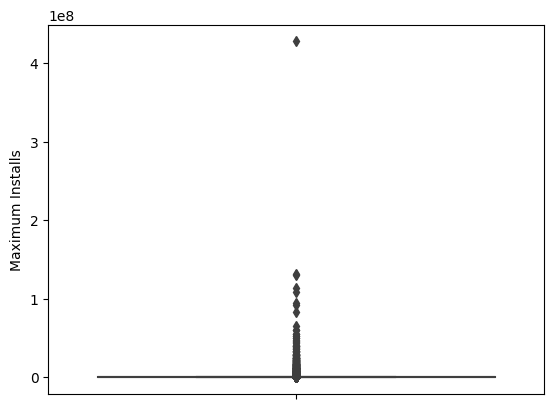

In [35]:
#taking only the Adventure Category
import seaborn as sns
import matplotlib.pyplot as plt

dataset_adventure = dataset[dataset['Category'] == "Adventure"] 
dataset_adventure.head()

sns.boxplot( y=dataset_adventure["Maximum Installs"] )
plt.show()

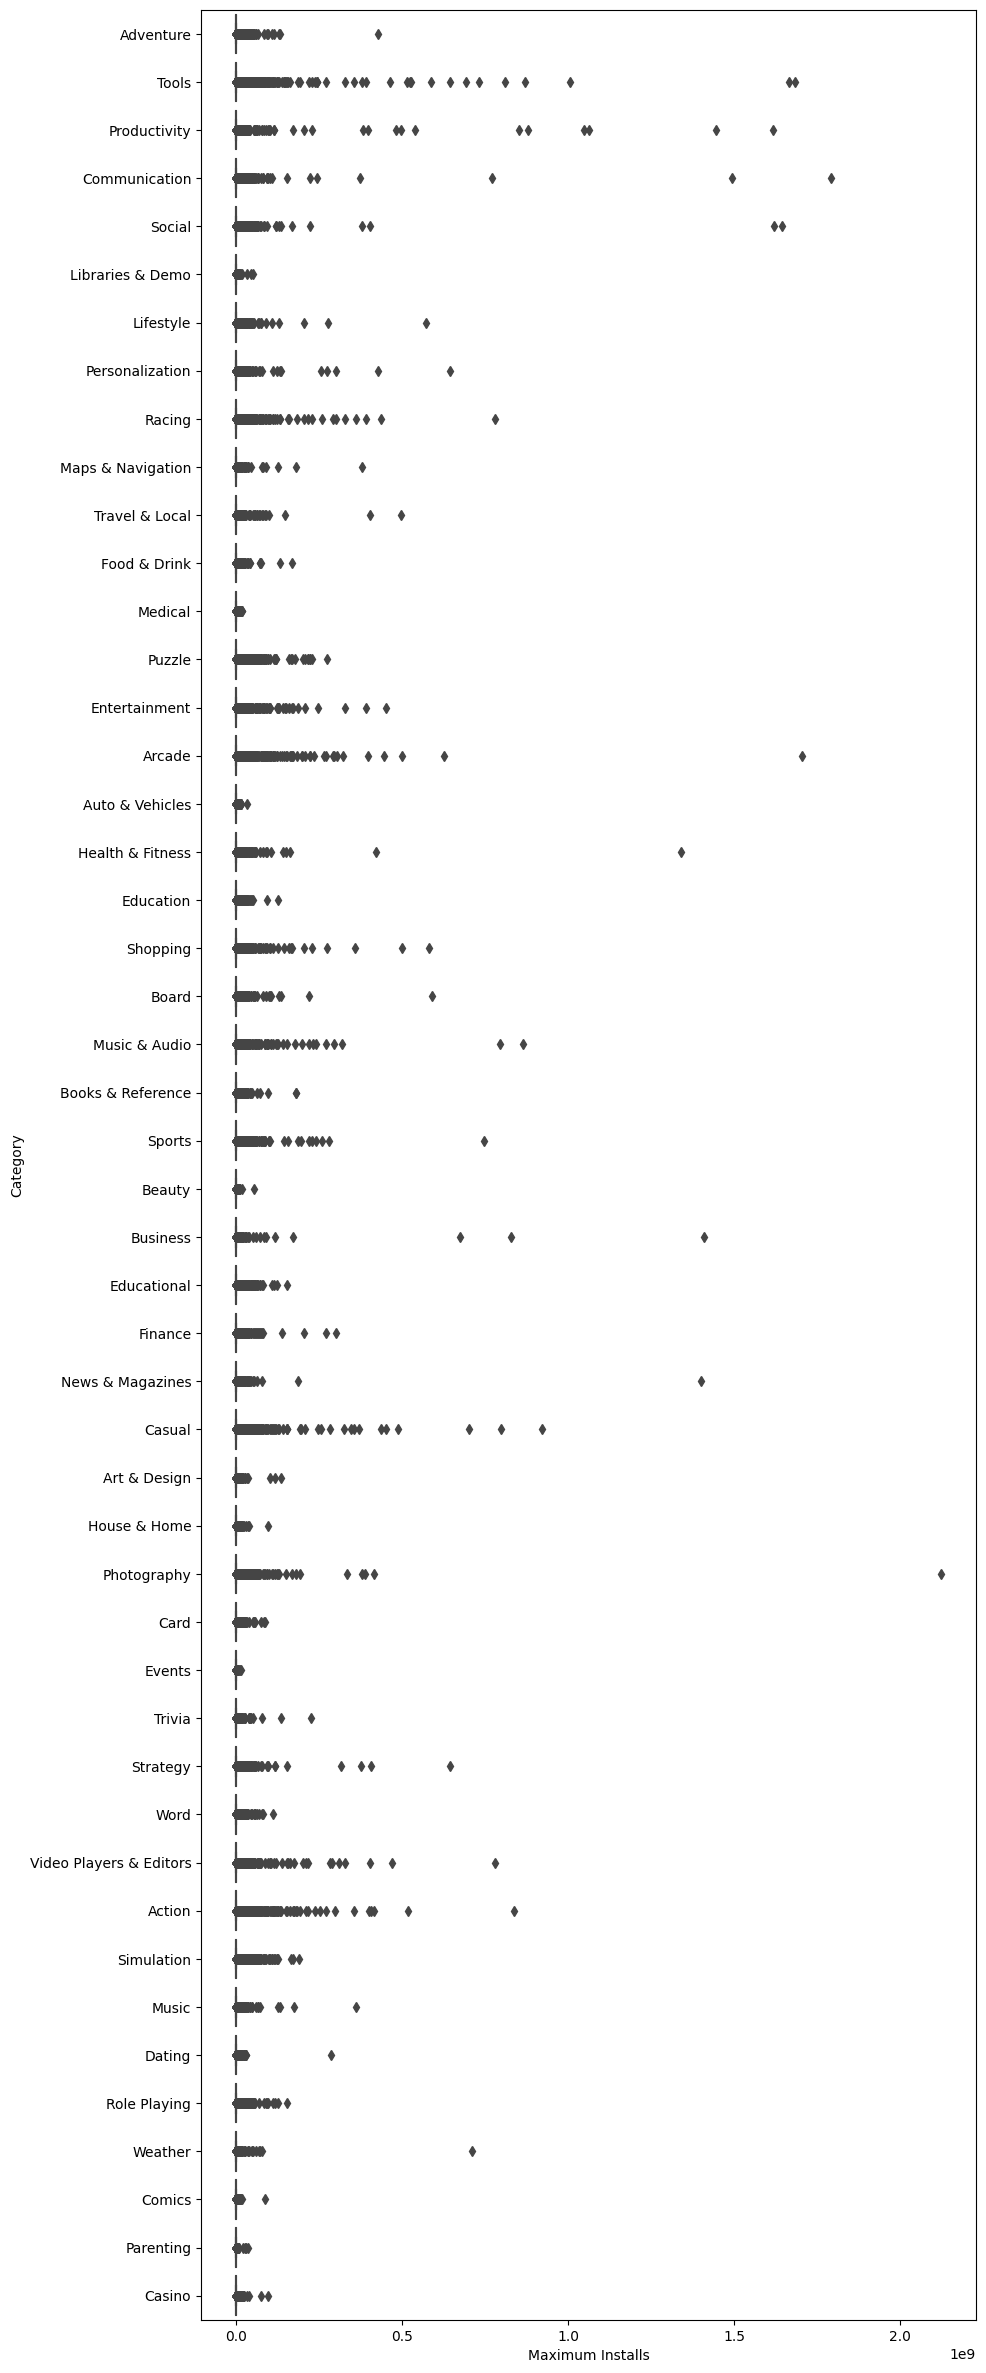

In [36]:
#drawing for each category

import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=[10, 30])
sns.boxplot(data=dataset, x="Maximum Installs", y="Category")
plt.show()


### b) Correlation of various factors involved


The Kendall rank coefficient is often used as a test statistic in a statistical hypothesis test to establish whether two variables may be regarded as statistically dependent. 

This test is non-parametric, as it does not rely on any assumptions on the distributions of X or Y or the distribution of (X,Y).

C:\Users\Sanath Davis\AppData\Local\Temp\ipykernel_25148\1279960079.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(method="kendall"), annot=True, cmap="seismic")
C:\Users\Sanath Davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Text(0.5, 1.1, 'Correlation: Google Play Store')

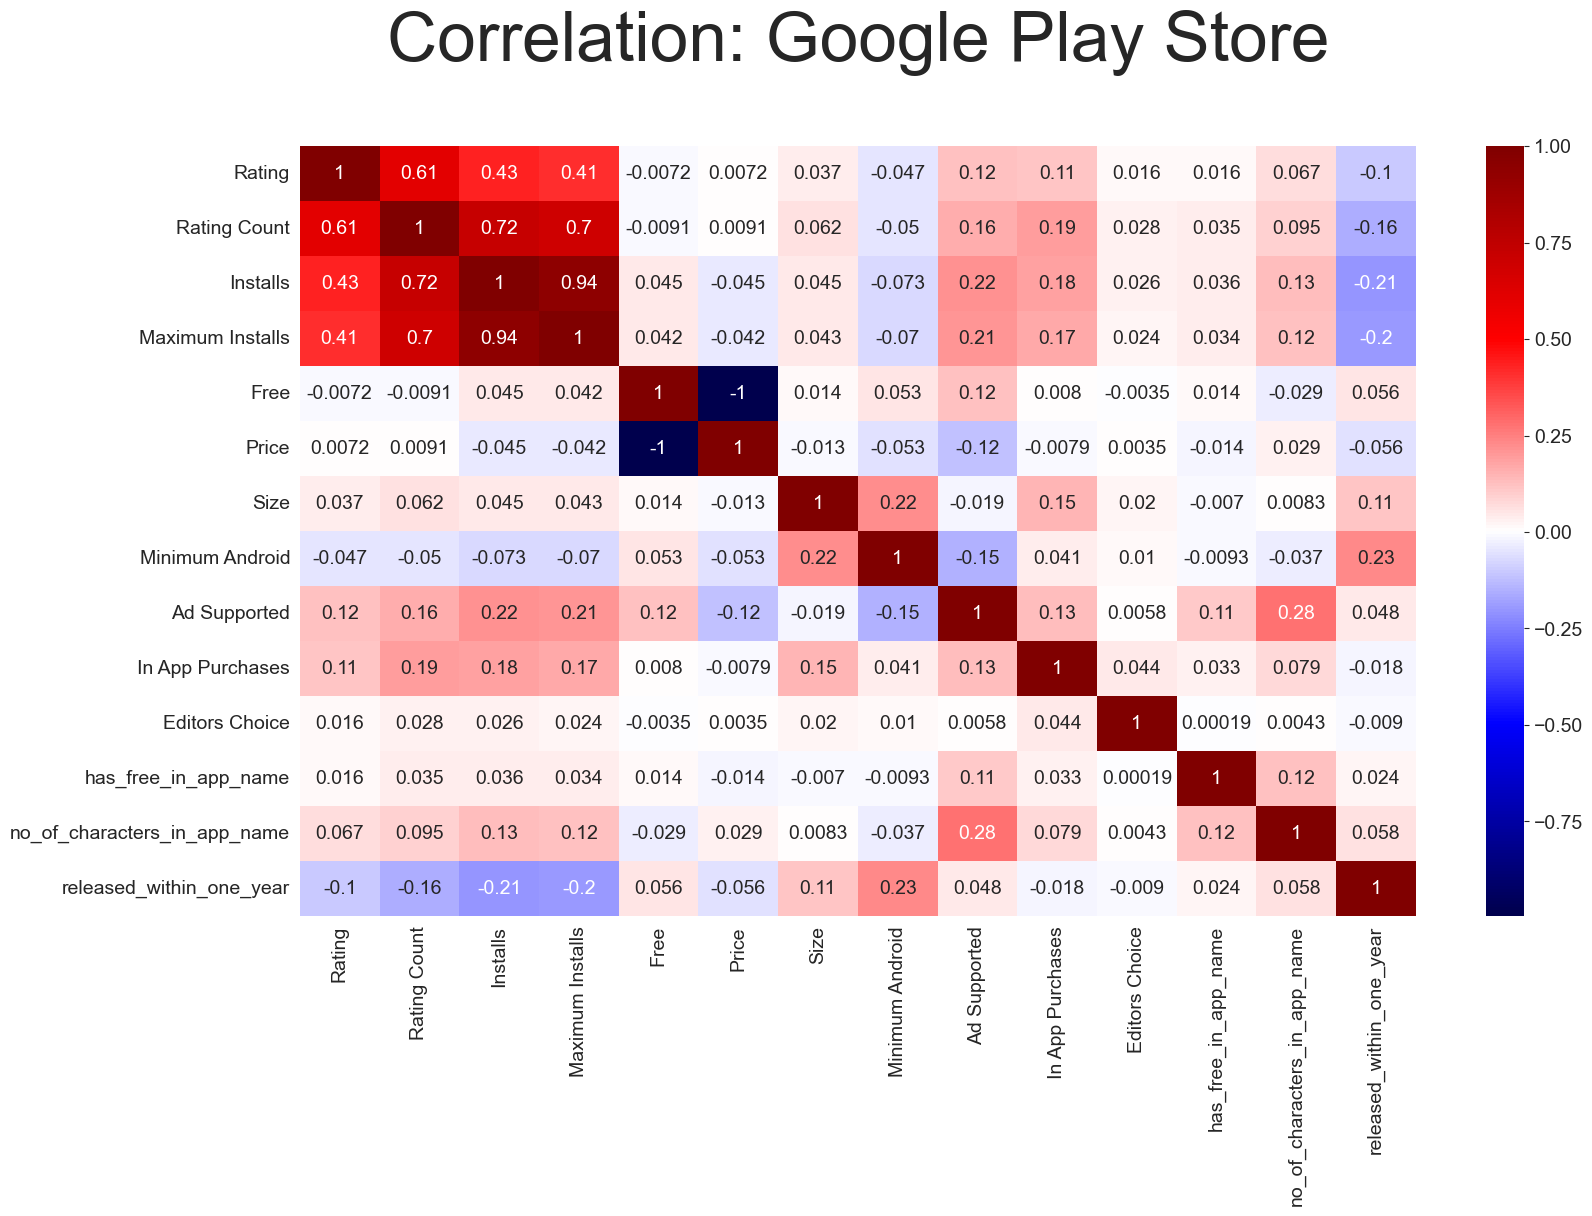

In [37]:
#We want to quantify the association between variables of our dataset.
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = '#00000000'
plt.figure(figsize=(18,10))

#We will uses the correlation function of pandas and then the heatmap of seaborn. We will use the Kendall method
# We will use the seismic color coding
sns.heatmap(dataset.corr(method="kendall"), annot=True, cmap="seismic")
plt.title("Correlation: Google Play Store", y=1.1, size=50, weight=300)

### c) Density of the rating of apps

We are going to use KDEPLOT of Seaborn for this

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

C:\Users\Sanath Davis\AppData\Local\Temp\ipykernel_25148\550283905.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=ratings_dataset[ratings_dataset > 0], shade=True)


<AxesSubplot:title={'center':'Rating of apps'}, xlabel='Ratings', ylabel='Density'>

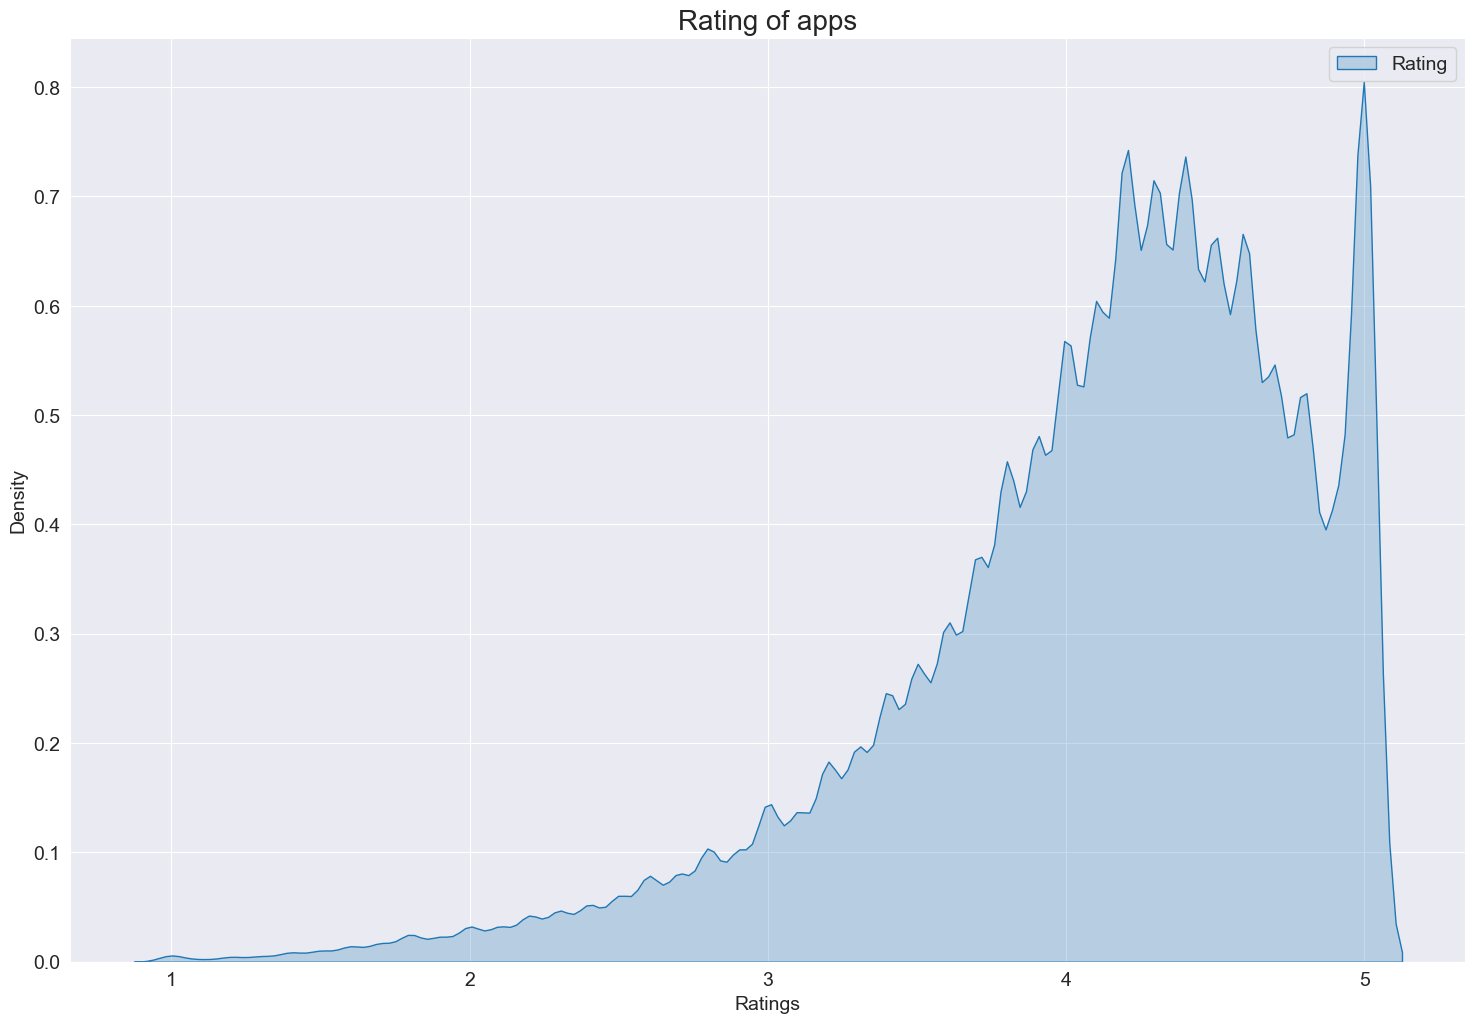

In [38]:
# Create a test dataframe with only the ratings.
ratings_dataset = dataset["Rating"].sort_values().reset_index().drop(columns=["index"])
ratings_dataset.value_counts().head(5)
plt.figure(figsize=(18,12))

# Get the density of apps in each rating area using kdeplot
plt.title("Rating of apps", fontsize=20, weight=400)
plt.xlabel("Ratings")
plt.ylabel("Density")
sns.kdeplot(data=ratings_dataset[ratings_dataset > 0], shade=True)

### d) Density of app sizes

Let us draw the KDE plot for the app sizes distribution

C:\Users\Sanath Davis\AppData\Local\Temp\ipykernel_25148\3462618427.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=size_dataset[size_dataset > 0], shade=True)


<AxesSubplot:title={'center':'Rating of apps'}, xlabel='Size', ylabel='Density'>

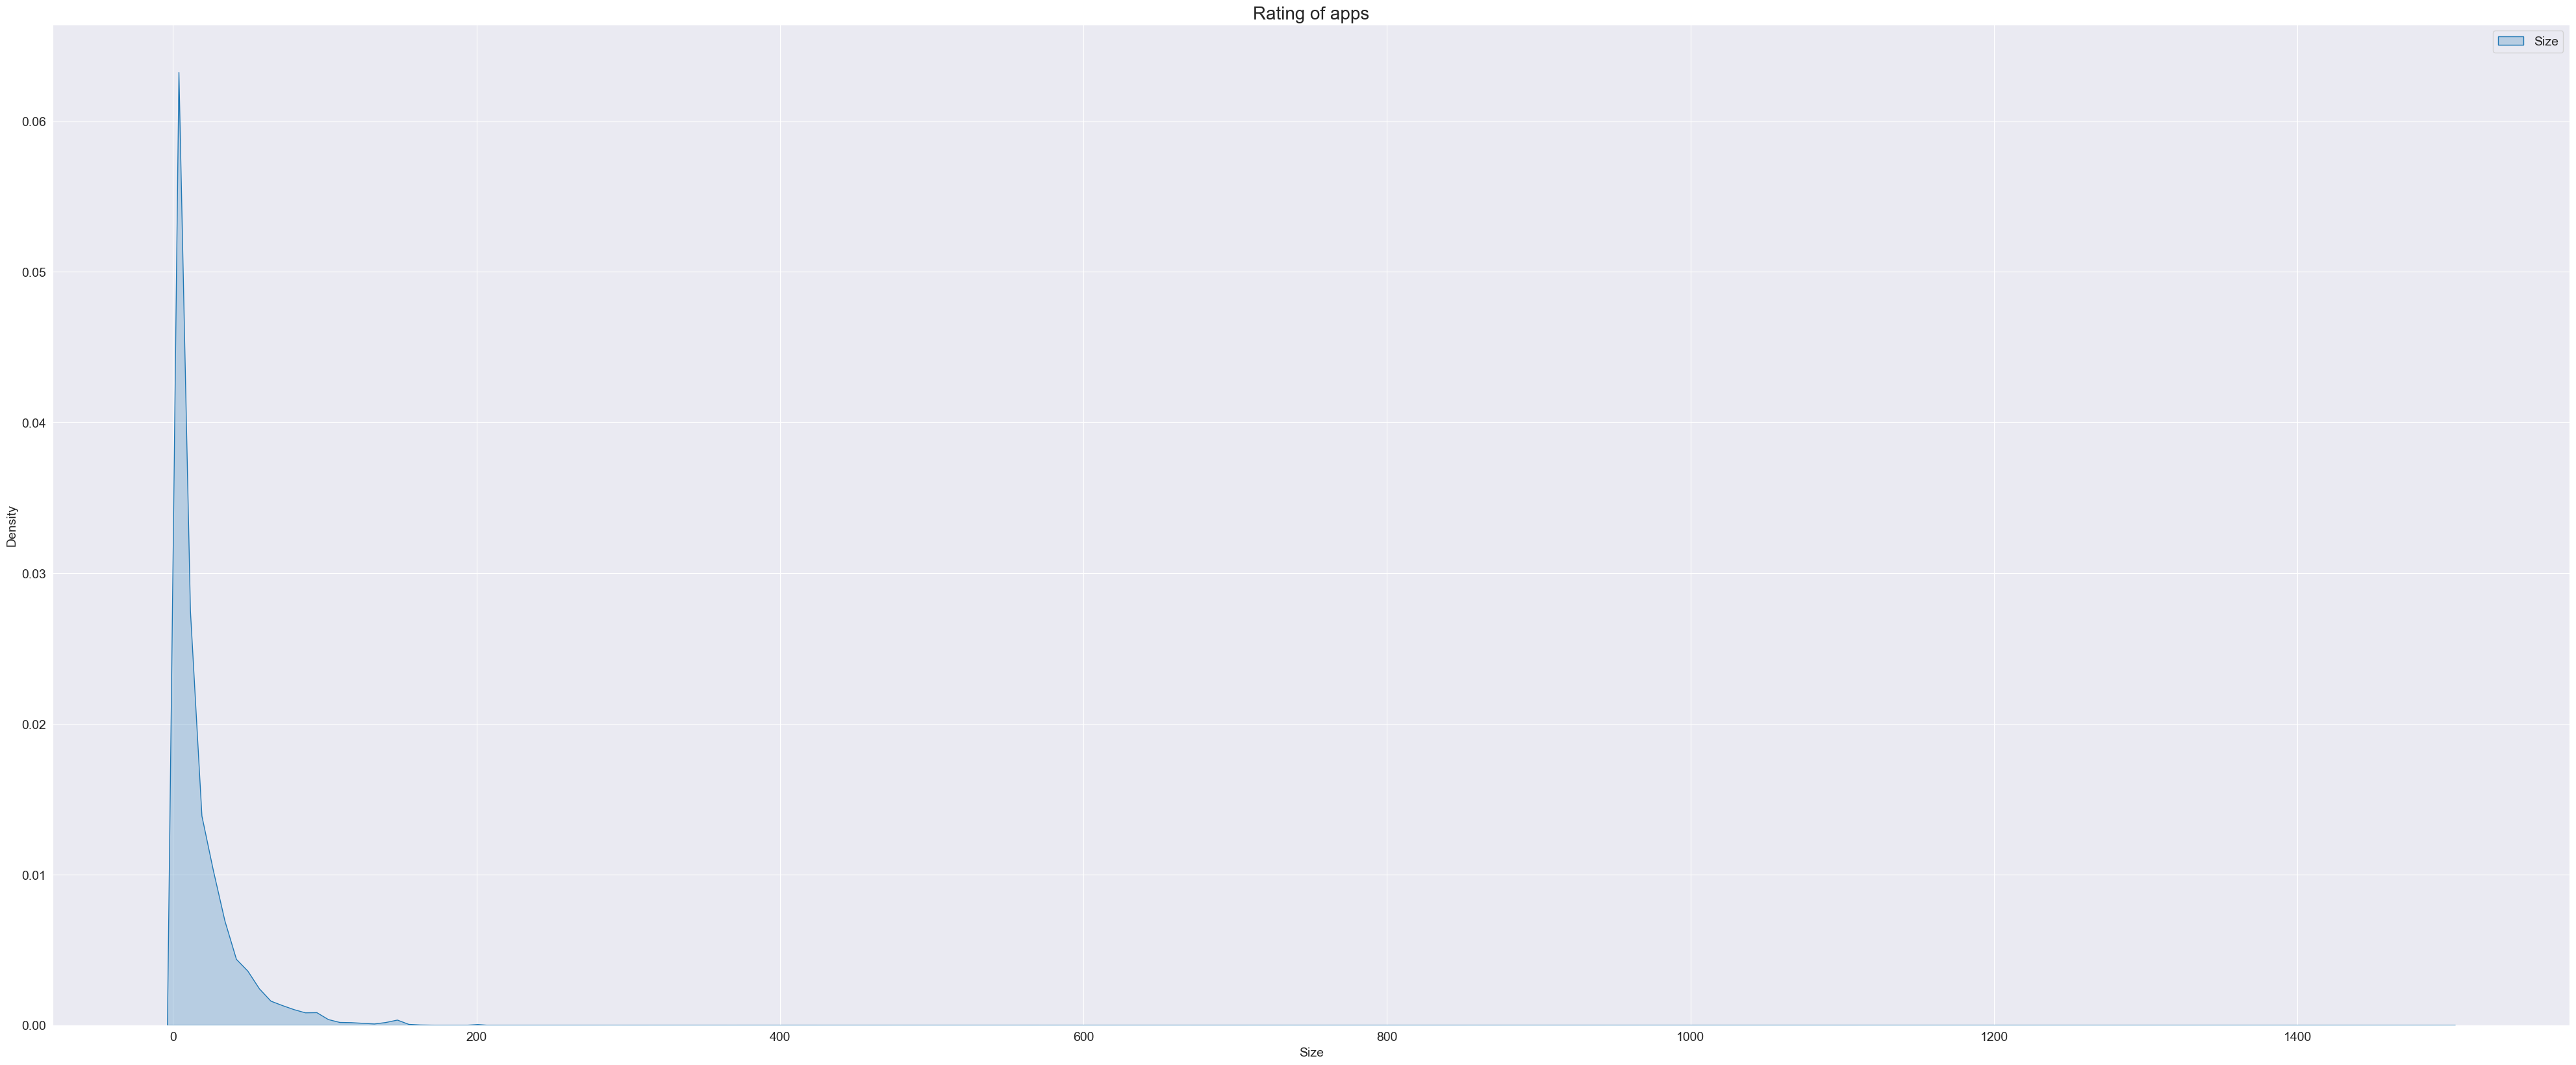

In [39]:
# Create a test dataframe with only the ratings.
size_dataset = dataset["Size"].sort_values().reset_index().drop(columns=["index"])
size_dataset.value_counts().head(5)
plt.figure(figsize=(50,20))

# Get the density of apps in each rating area using kdeplot
plt.title("Rating of apps", fontsize=20, weight=400)
plt.xlabel("Size")
plt.ylabel("Density")
sns.kdeplot(data=size_dataset[size_dataset > 0], shade=True)

### e) Size v Price

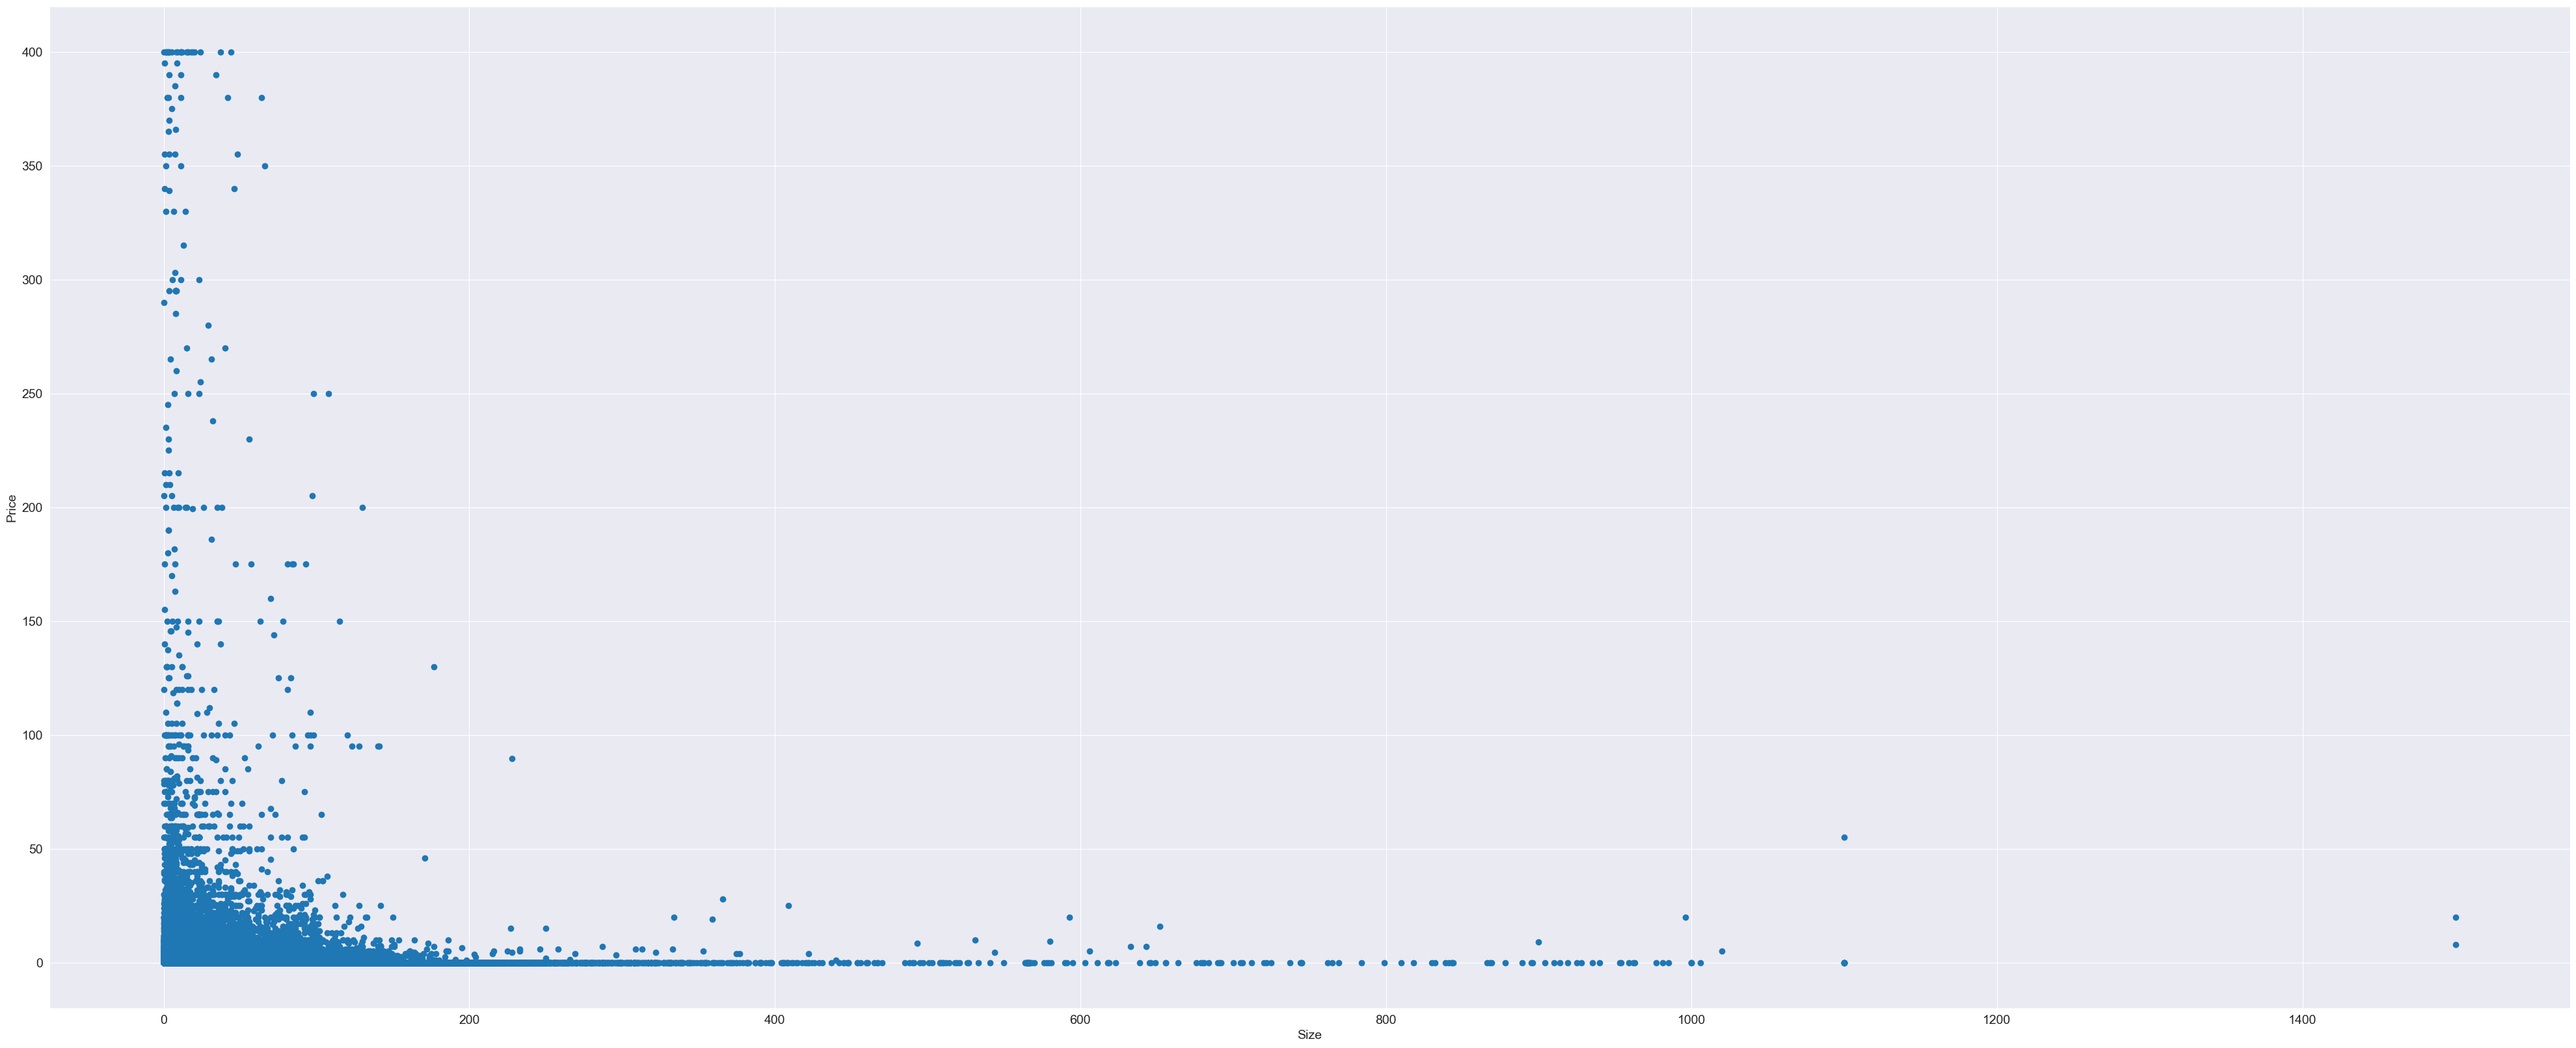

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))
plt.xlabel("Size")
plt.ylabel("Price")
plt.scatter(dataset["Size"], dataset["Price"])

### f) Category vs Number of Installs



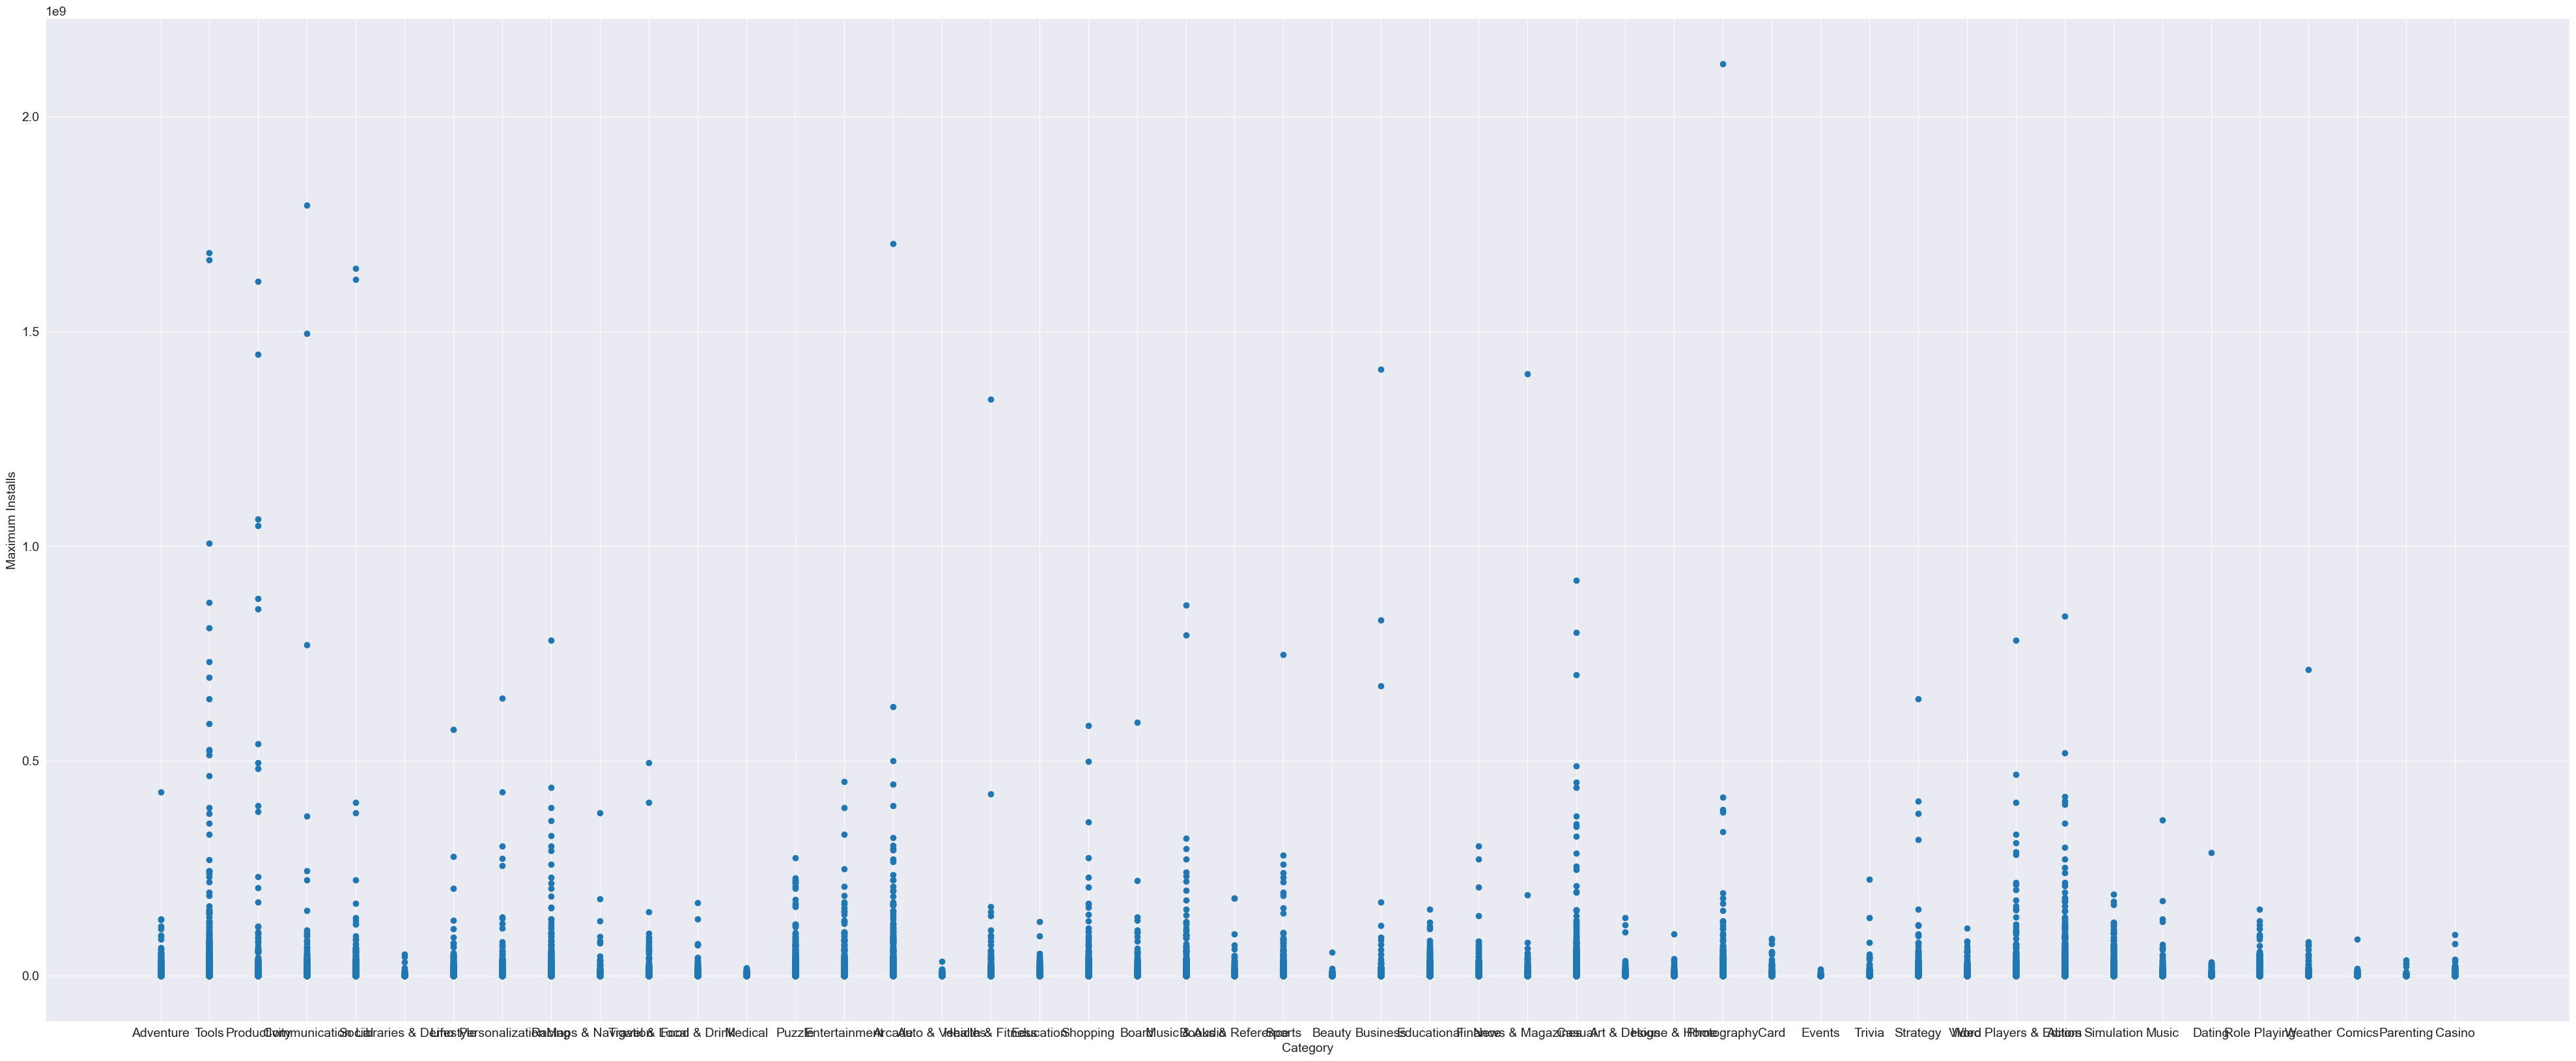

In [41]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))
plt.xlabel("Category")
plt.ylabel("Maximum Installs")
plt.scatter(dataset["Category"], dataset["Maximum Installs"])

### g) Full scatter plot between size and installs

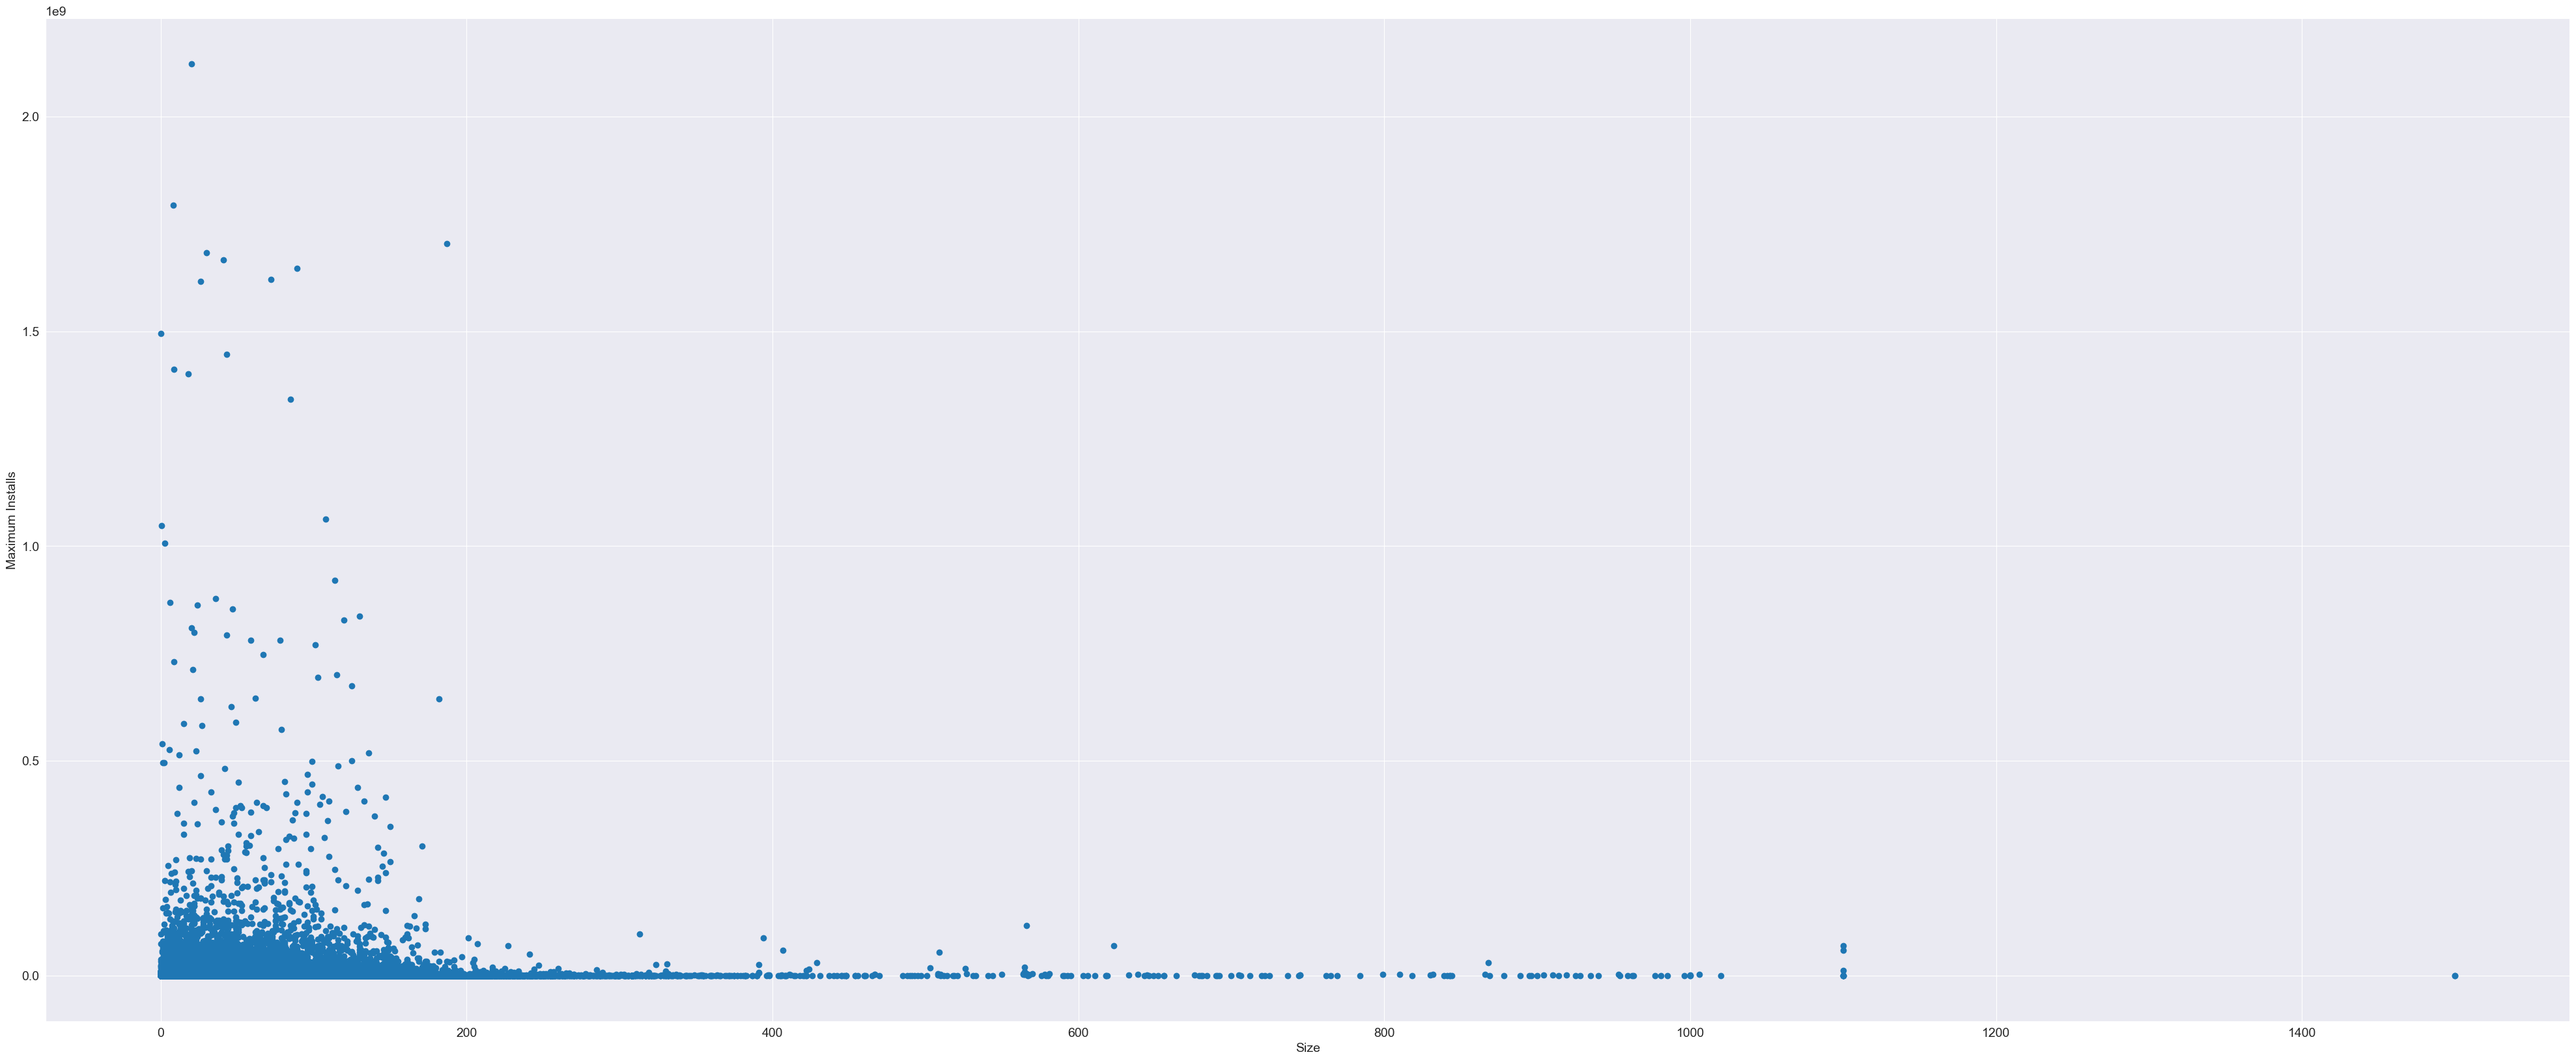

In [42]:

from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))
plt.xlabel("Size")
plt.ylabel("Maximum Installs")
plt.scatter(dataset["Size"], dataset["Maximum Installs"])


### h) Full scatter plot between price and installs

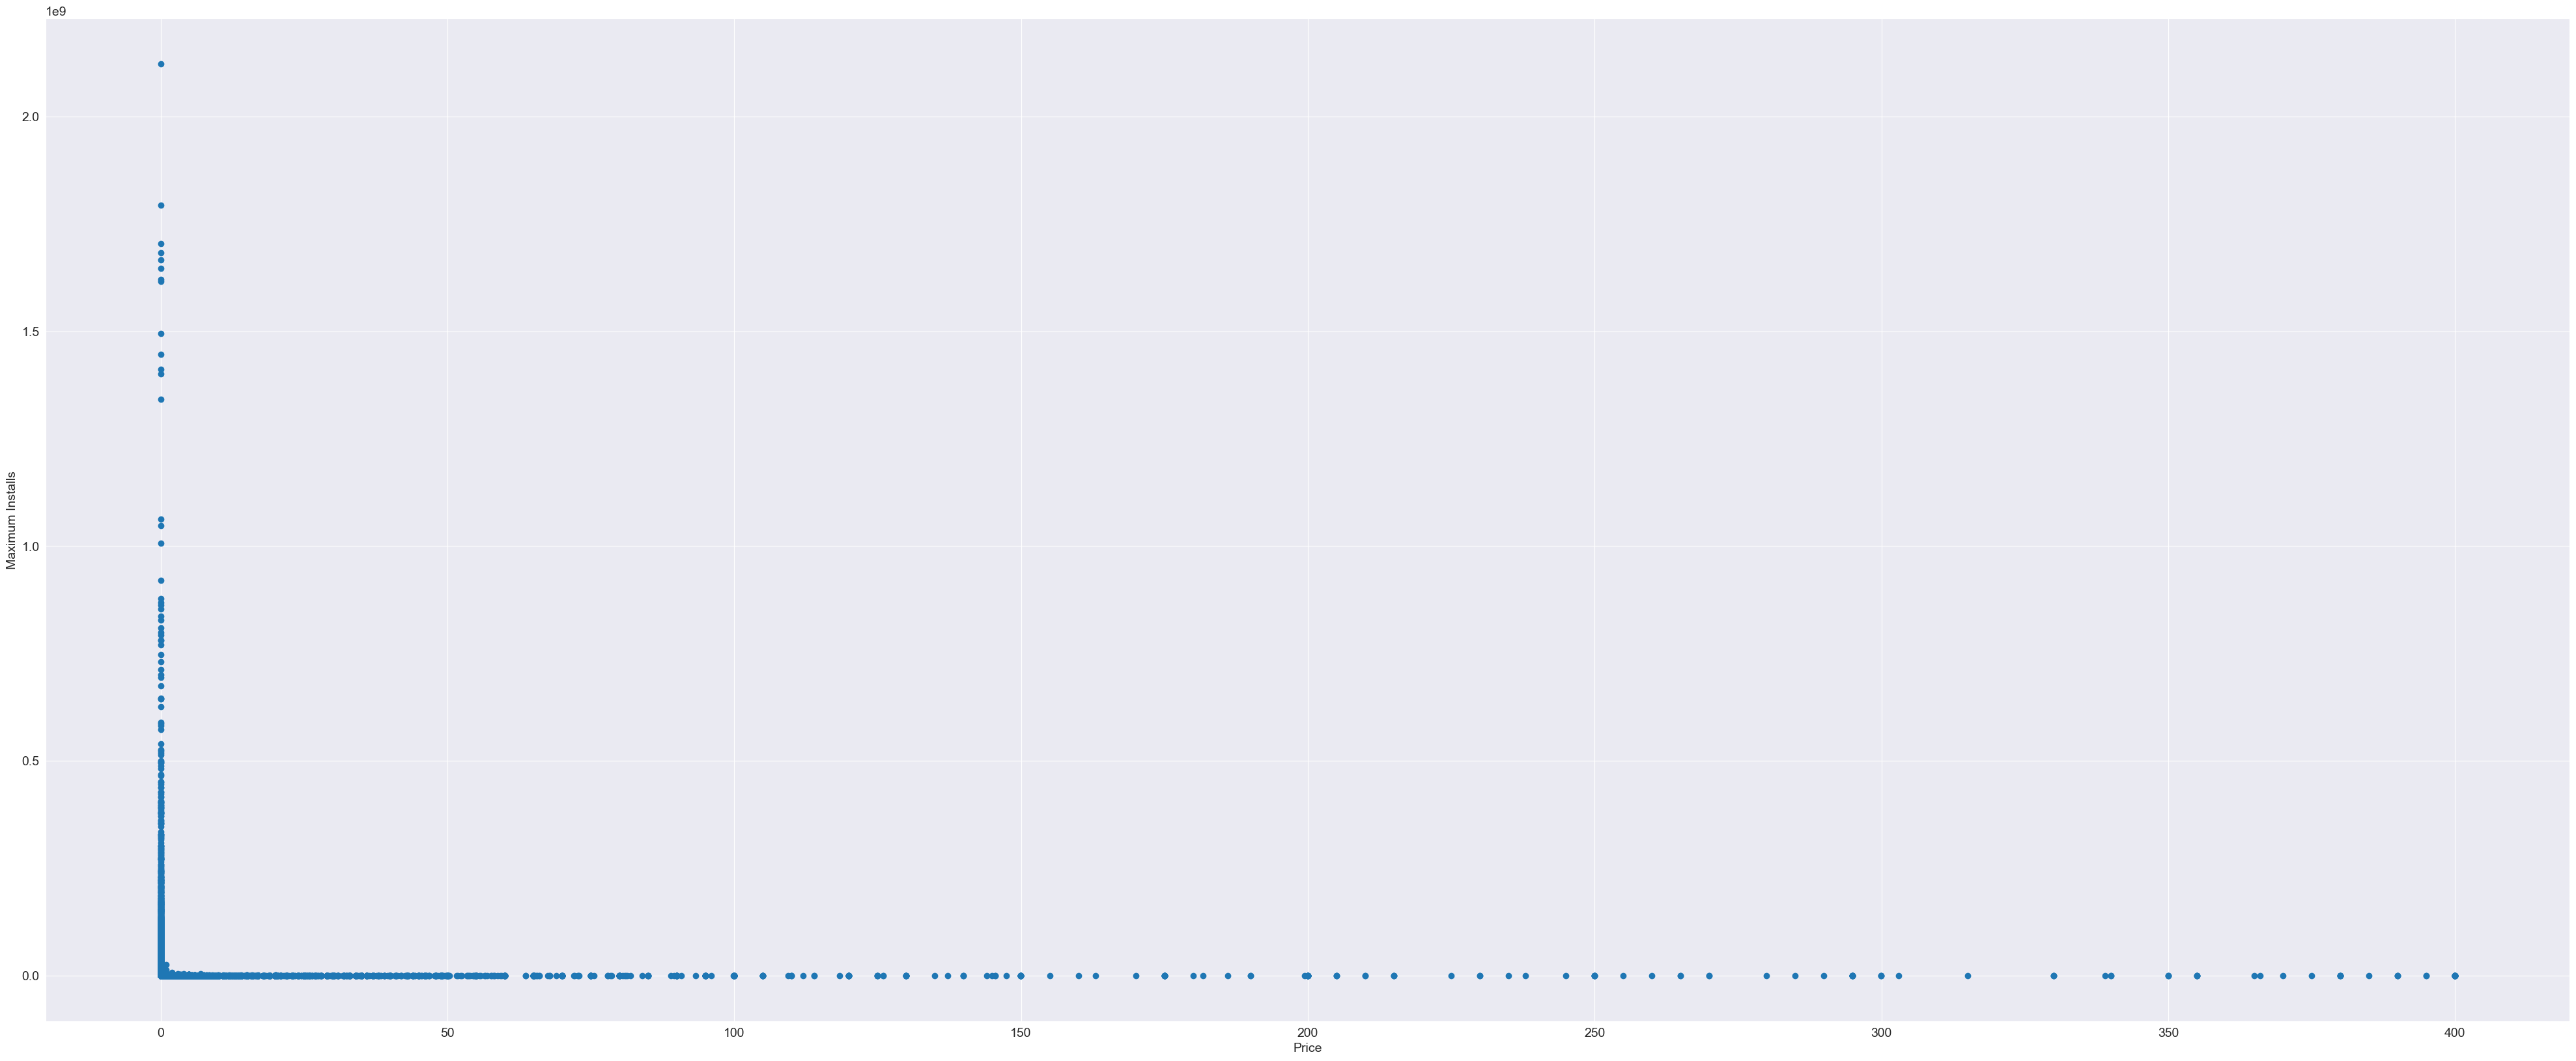

In [43]:

from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))
plt.xlabel("Price")
plt.ylabel("Maximum Installs")
plt.scatter(dataset["Price"], dataset["Maximum Installs"])

### i) Full scatter plot between size and ratings

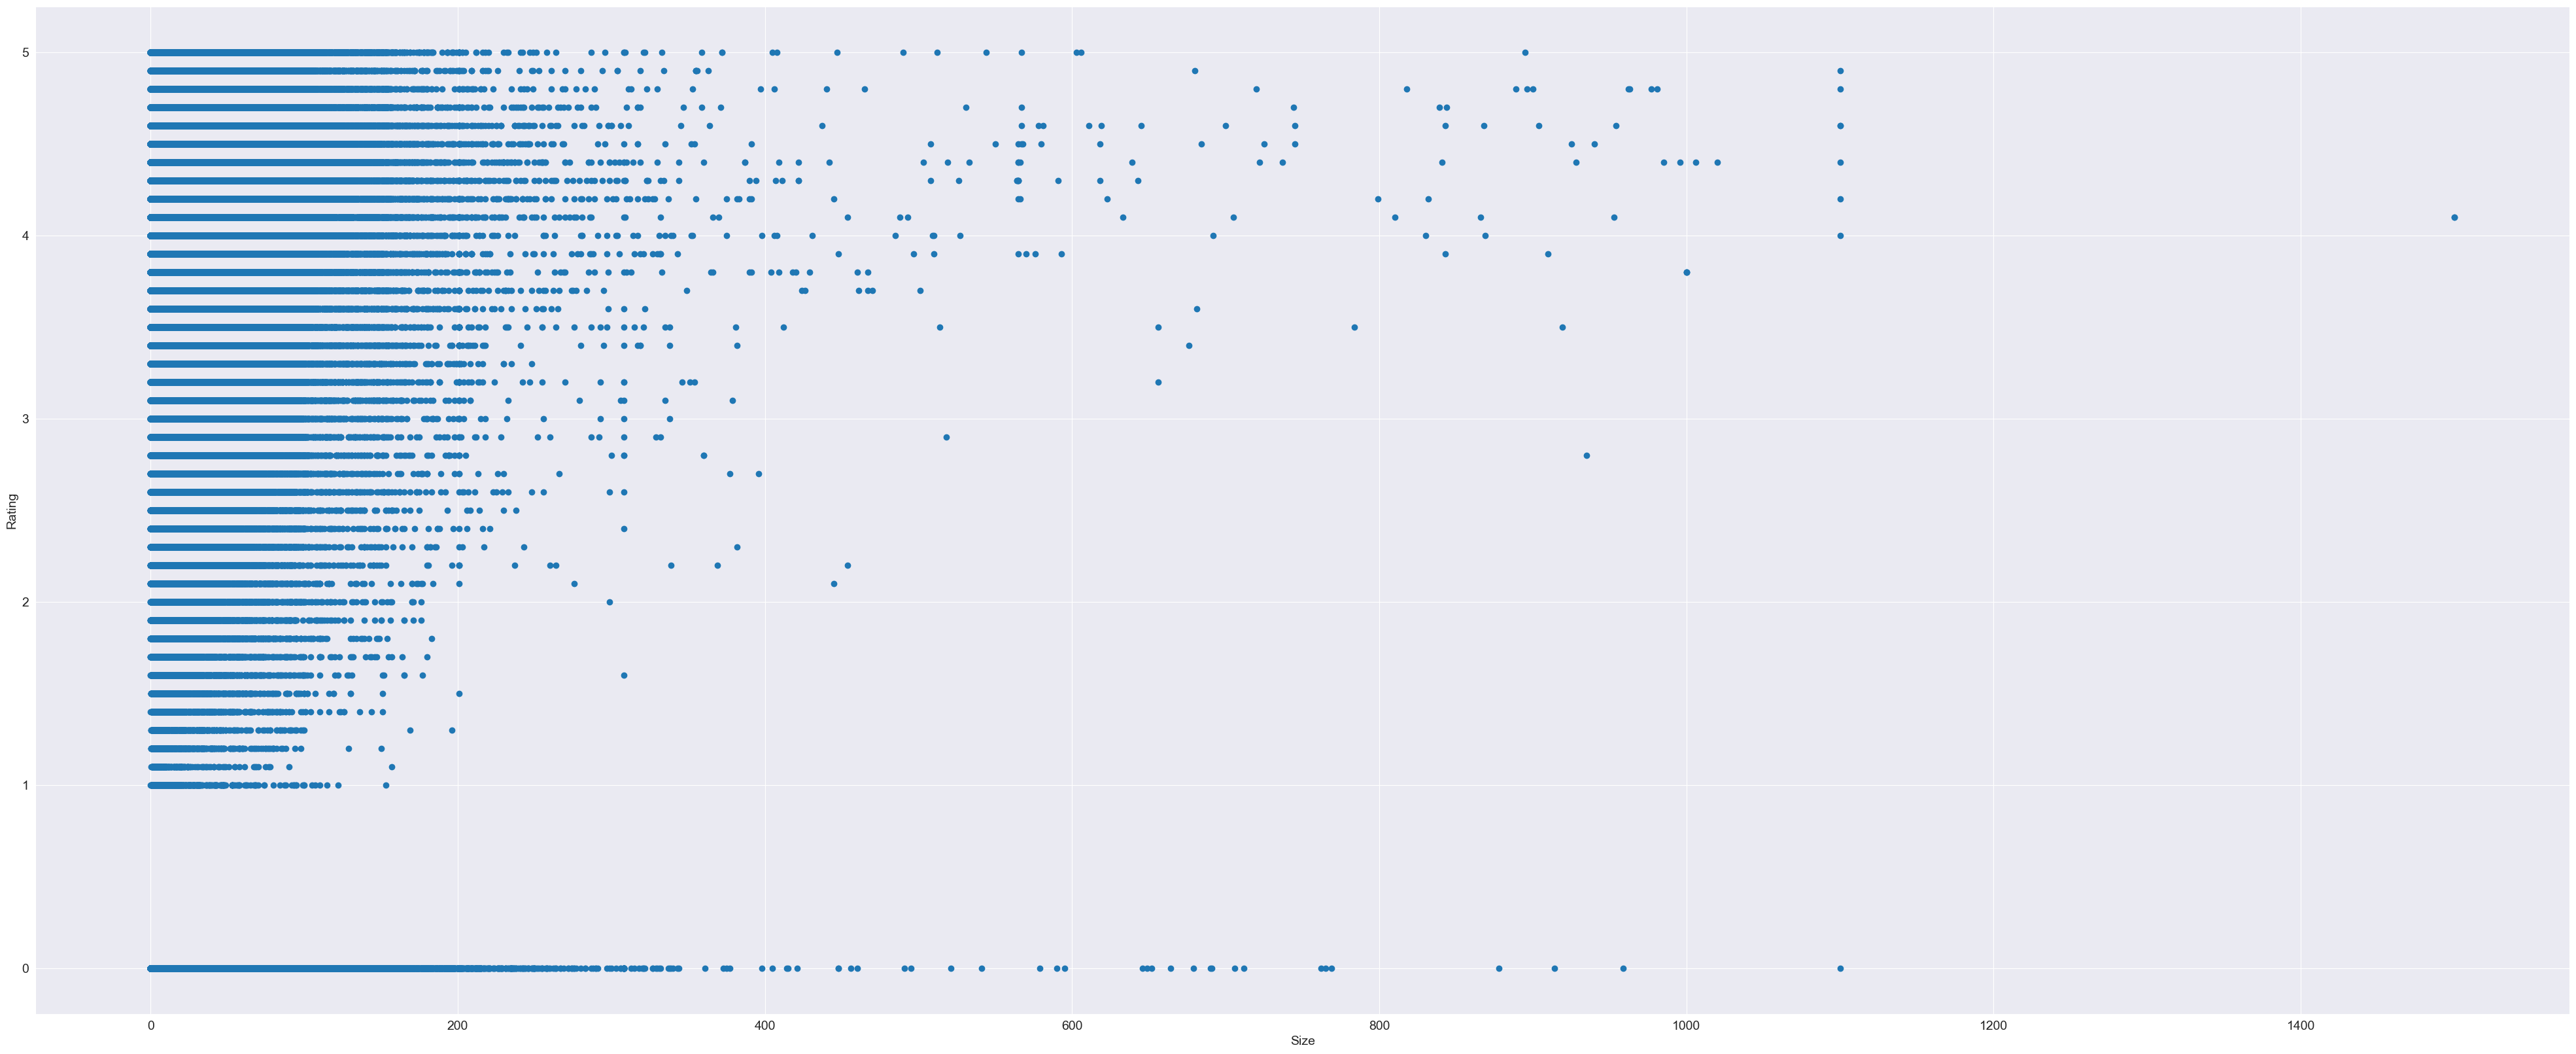

In [44]:

from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))
plt.xlabel("Size")
plt.ylabel("Rating")
plt.scatter(dataset["Size"], dataset["Rating"])

### j) Full scatter plot between price and ratings

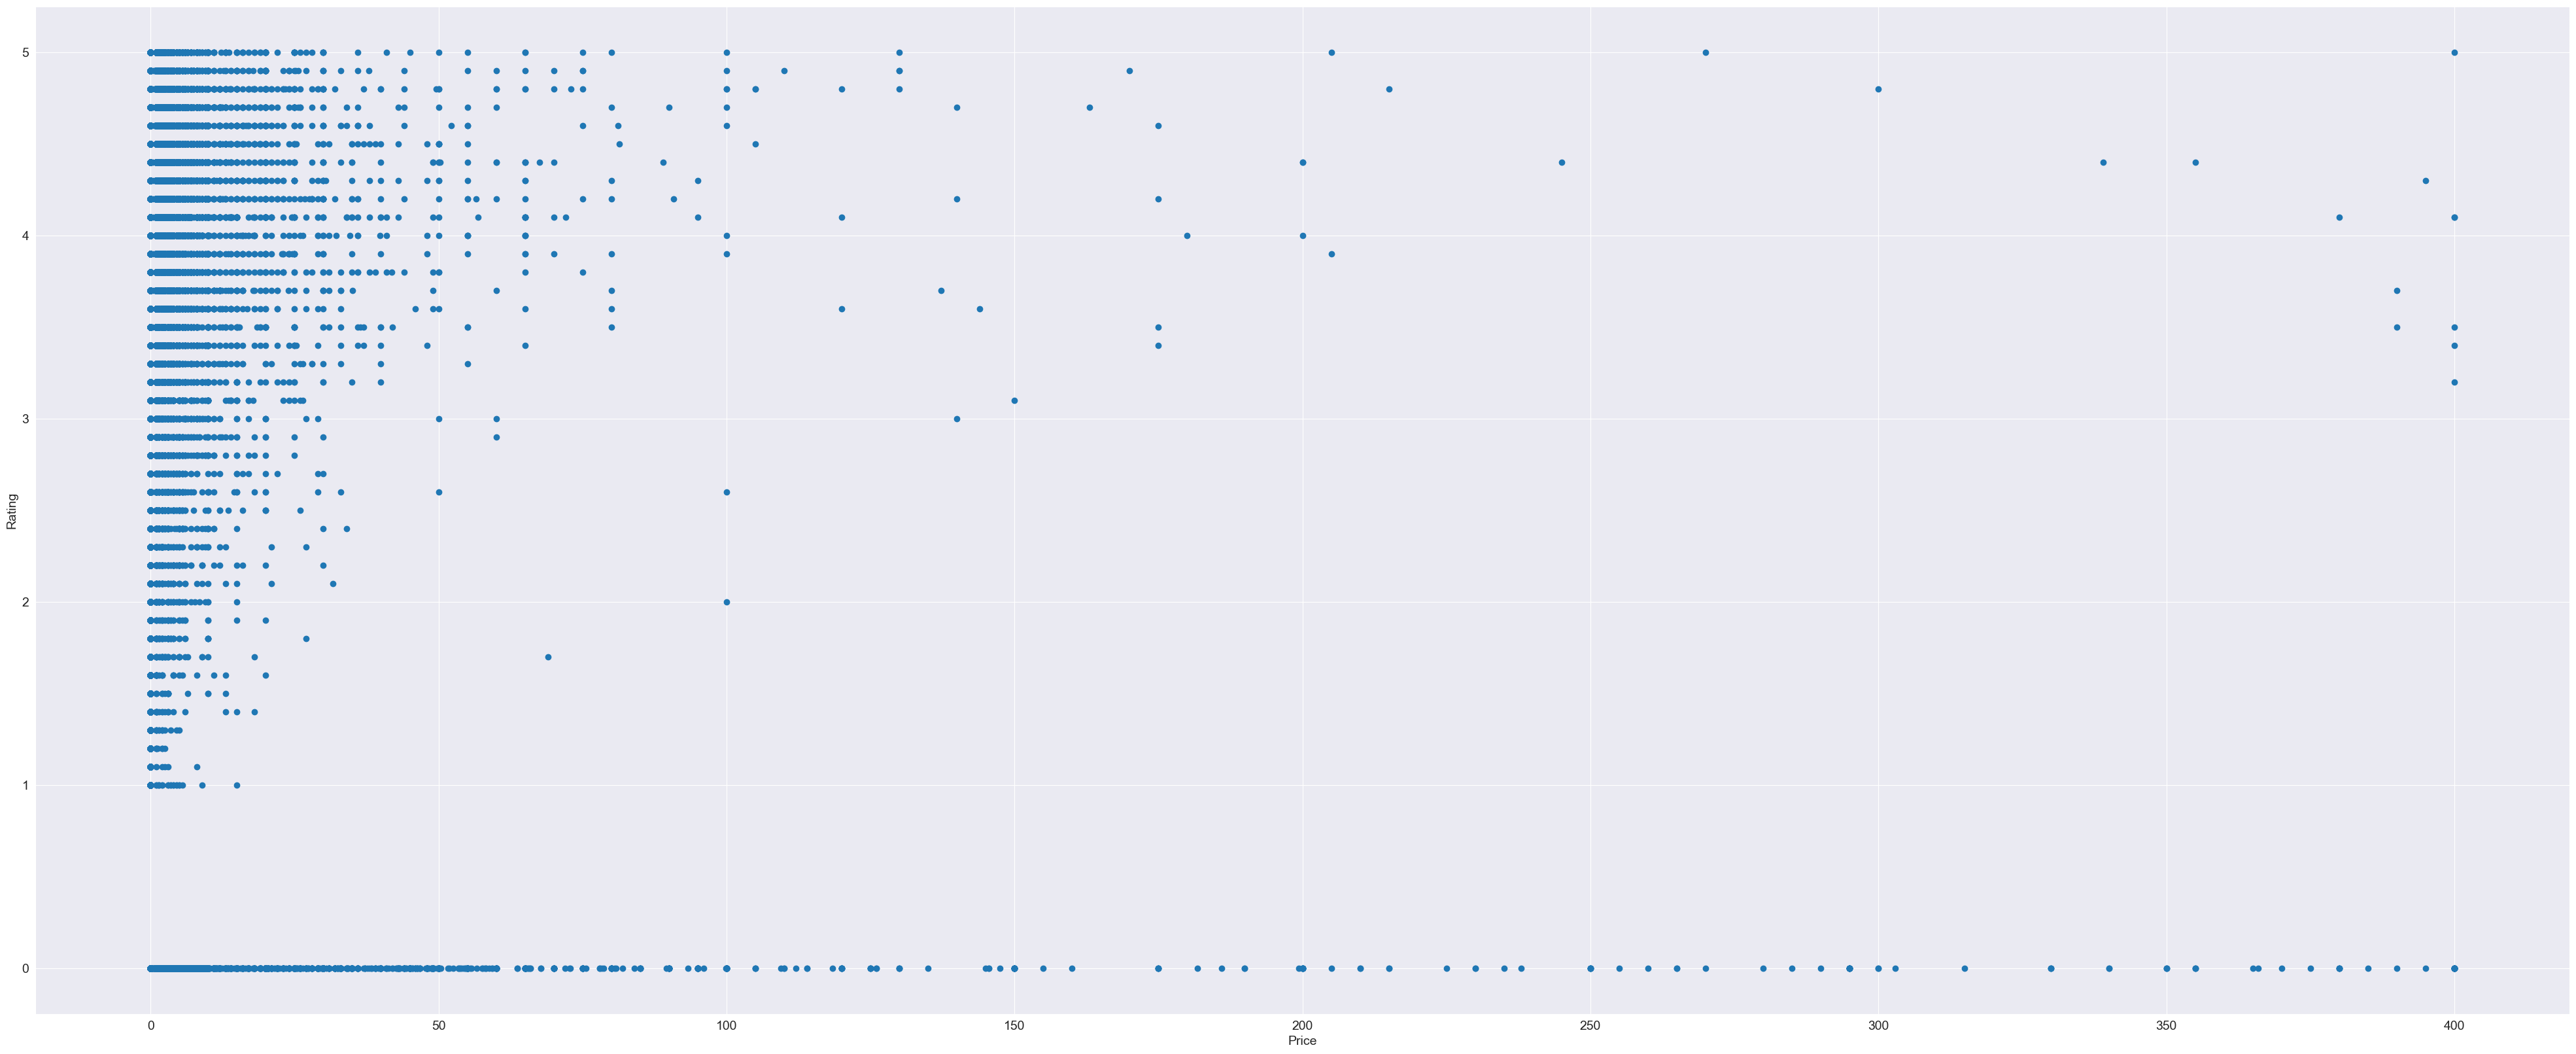

In [45]:

from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))
plt.xlabel("Price")
plt.ylabel("Rating")
plt.scatter(dataset["Price"], dataset["Rating"])

### k) Categories vs Installs

['Adventure' 'Tools' 'Productivity' 'Communication' 'Social'
 'Libraries & Demo' 'Lifestyle' 'Personalization' 'Racing'
 'Maps & Navigation' 'Travel & Local' 'Food & Drink' 'Medical' 'Puzzle'
 'Entertainment' 'Arcade' 'Auto & Vehicles' 'Health & Fitness' 'Education'
 'Shopping' 'Board' 'Music & Audio' 'Books & Reference' 'Sports' 'Beauty'
 'Business' 'Educational' 'Finance' 'News & Magazines' 'Casual'
 'Art & Design' 'House & Home' 'Photography' 'Card' 'Events' 'Trivia'
 'Strategy' 'Word' 'Video Players & Editors' 'Action' 'Simulation' 'Music'
 'Dating' 'Role Playing' 'Weather' 'Comics' 'Parenting' 'Casino']
Education                  233858
Music & Audio              152493
Business                   138291
Tools                      137839
Entertainment              134355
Lifestyle                  115415
Books & Reference          114621
Personalization             87506
Health & Fitness            80742
Productivity                75522
Shopping                    73535
Food & Dri

<AxesSubplot:>

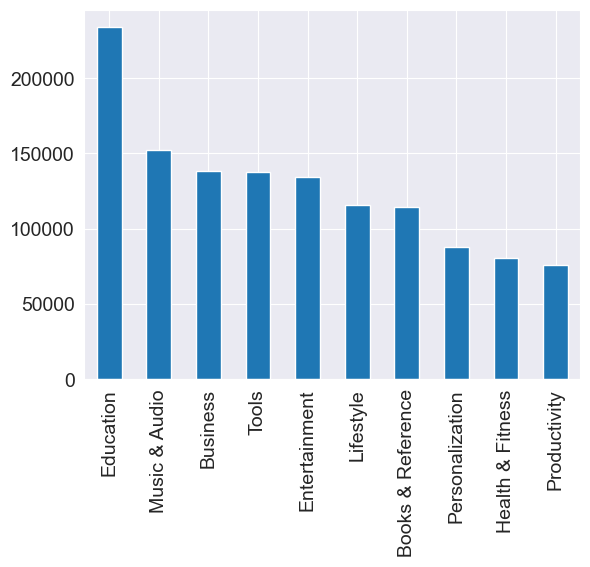

In [46]:
#view unique values in category colummn
print(dataset.Category.unique())

print(dataset.Category.value_counts(sort=True))

dataset.Category.value_counts(sort=True).nlargest(10).plot.bar()

## Pandas Profiling

pandas-profiling generates profile reports from a pandas DataFrame which is handy for exploratory data analysis. 

In [47]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [48]:
#creating pandas profile
profile = ProfileReport(dataset, title="Pandas Profiling Report")

In [49]:
#downloading an HTML version of Pandas Profiling Report (already available at https://sanathdavis.github.io/)
#profile.to_file("Pandas_Profiling_Report_of_the_Google_Playstore_Data.html")

In [50]:
#show the interactive pandas profile inside the notebook (already available at https://sanathdavis.github.io/)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Problem Statements




### 1) What should be the size of an app for it to get more installs?

Let us figure this out for a few different categories using plots

#### Adventure Category

In [51]:
# for the category Adventure

import matplotlib.pyplot as plt
dataset_adventure = dataset[dataset['Category'] == "Adventure"] 
dataset_adventure['Size'].describe()

count    21799.000000
mean        36.798607
std         30.645039
min          0.045000
25%         16.000000
50%         29.000000
75%         50.000000
max       1100.000000
Name: Size, dtype: float64

In [52]:
bins = list(range(0,2000,100))
dataset_adventure['bins'] = pd.cut(x=dataset_adventure['Size'], bins=bins)

C:\Users\Sanath Davis\AppData\Local\Temp\ipykernel_25148\643804397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_adventure['bins'] = pd.cut(x=dataset_adventure['Size'], bins=bins)


[]

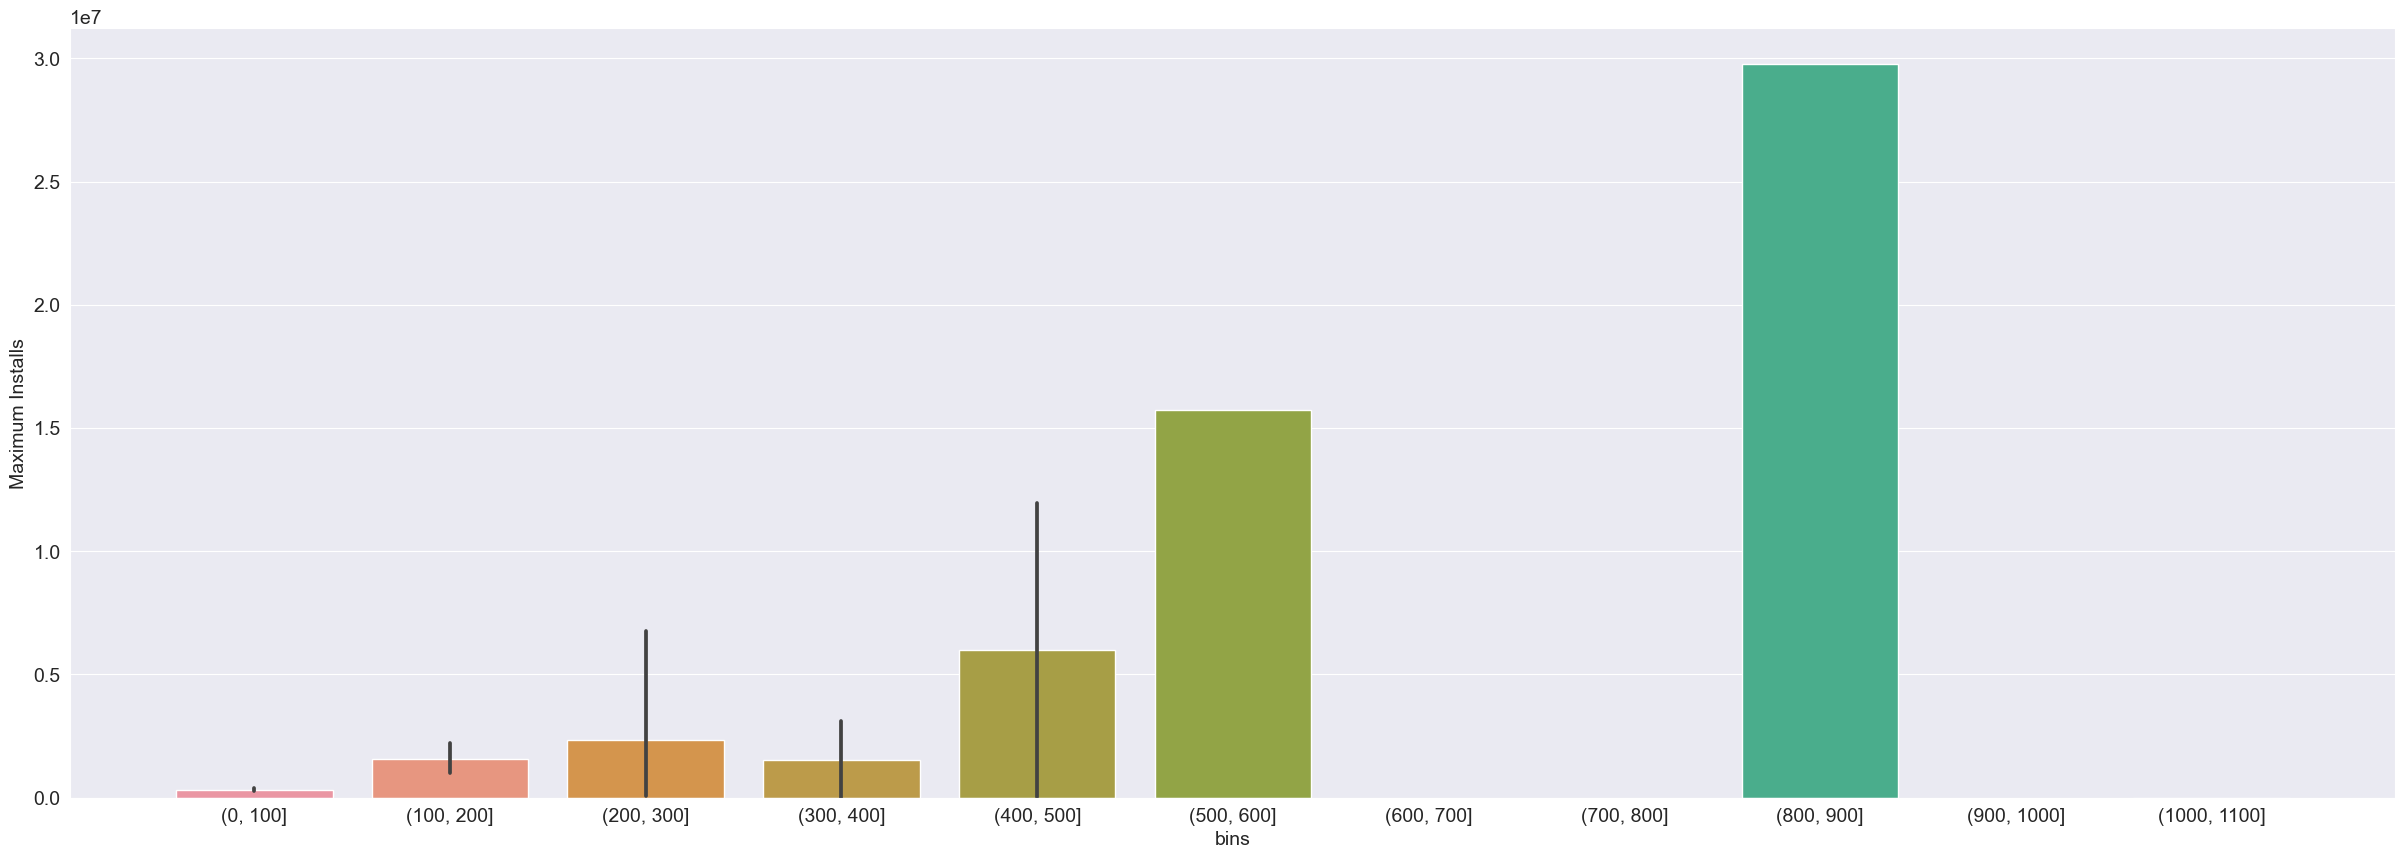

In [53]:
import seaborn as sns
plt.figure(figsize=[30, 10])
sns.barplot(data=dataset_adventure, x="bins", y="Maximum Installs")
plt.plot()

Here we can see that in the adventure category, the size 800-900 MB has the most number of installs.

#### Maps & Navigation Category

In [54]:
# for the category Maps

import matplotlib.pyplot as plt
dataset_maps = dataset[dataset['Category'] == "Maps & Navigation"] 
dataset_maps['Size'].describe()

count    25478.000000
mean        15.124189
std         19.315205
min          0.016000
25%          4.200000
50%          8.600000
75%         18.000000
max        382.000000
Name: Size, dtype: float64

In [55]:
#max is 382 MB, let us do 50 sized bins upto 400
bins = list(range(0,400,50))
dataset_maps['bins'] = pd.cut(x=dataset_maps['Size'], bins=bins)

C:\Users\Sanath Davis\AppData\Local\Temp\ipykernel_25148\1000909345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_maps['bins'] = pd.cut(x=dataset_maps['Size'], bins=bins)


[]

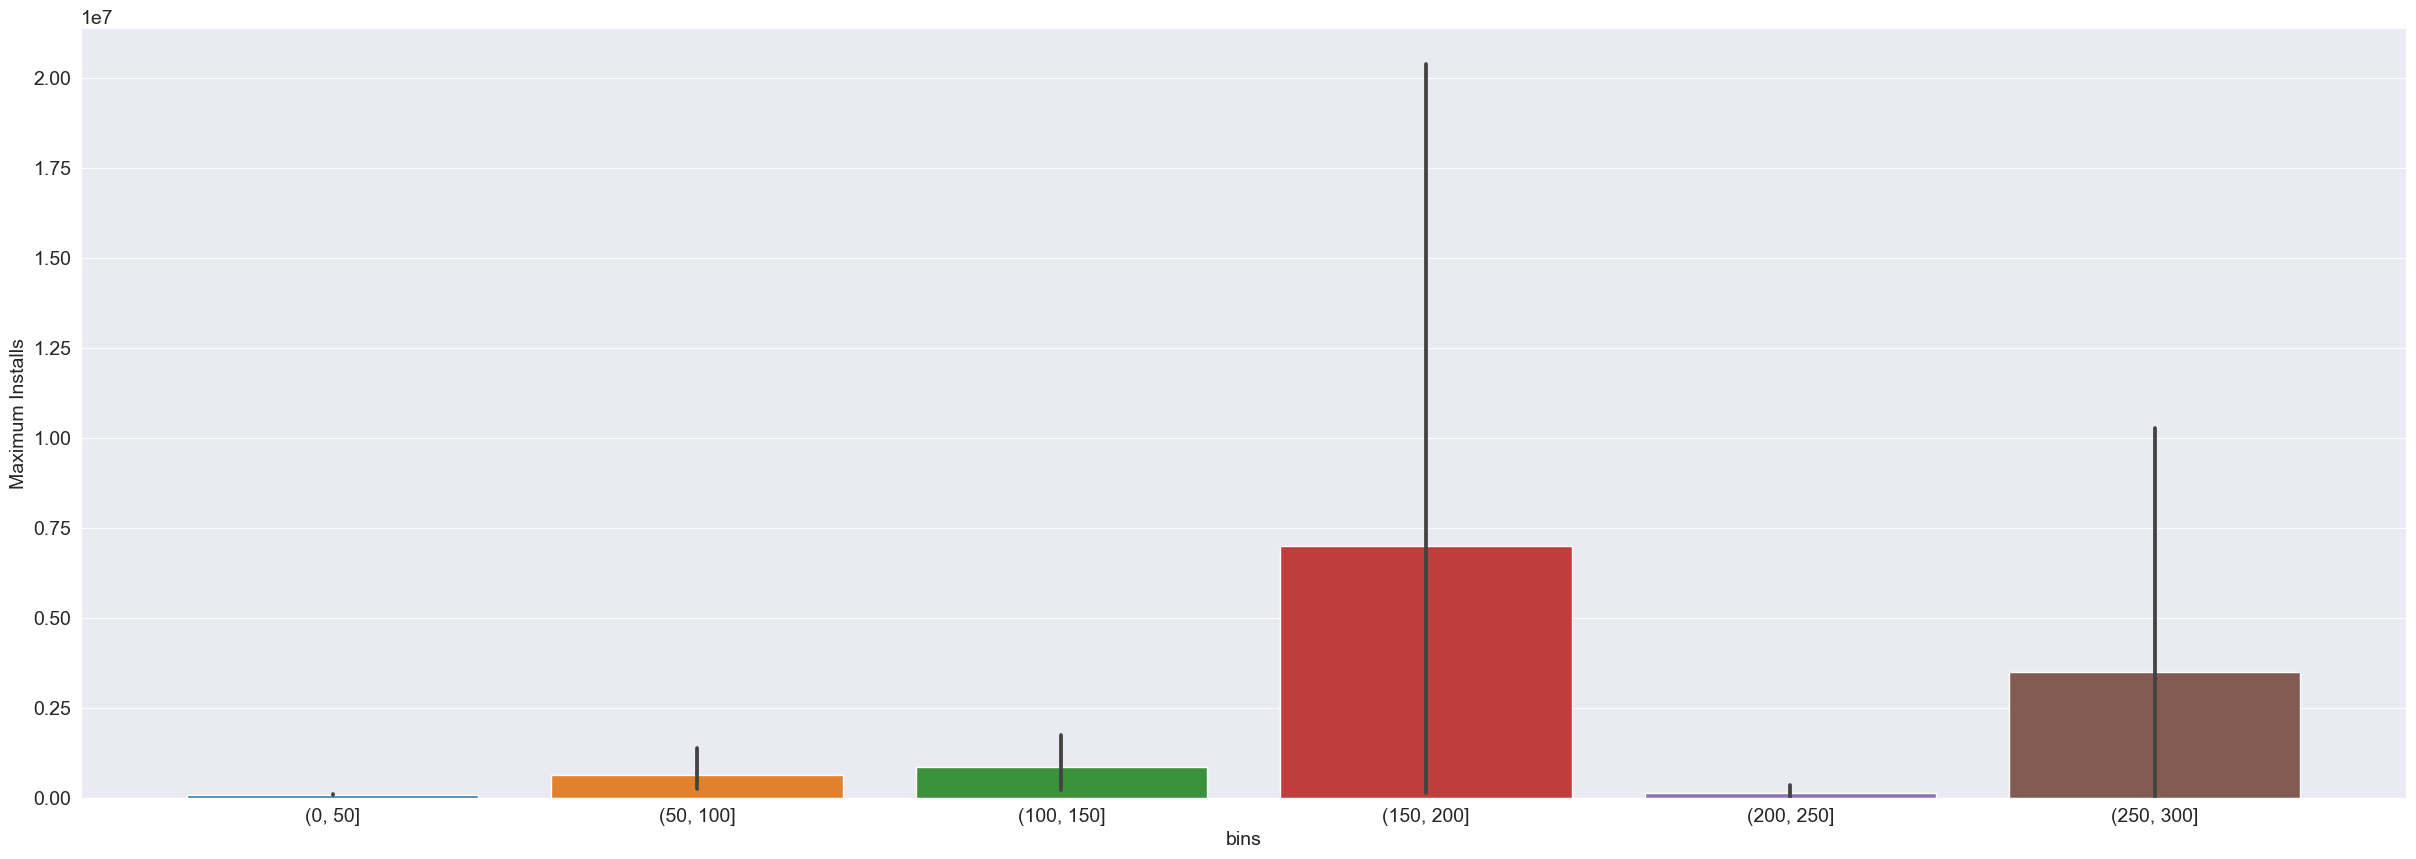

In [56]:
import seaborn as sns
plt.figure(figsize=[30, 10])
sns.barplot(data=dataset_maps, x="bins", y="Maximum Installs")
plt.plot()

Here we can see that 150-200 MB is the size which has the most number of downloads in the Maps Category

#### Role Playing Category

In [57]:
# for the category Role Playing

import matplotlib.pyplot as plt
dataset_role_playing = dataset[dataset['Category'] == "Role Playing"] 
dataset_role_playing['Size'].describe()

count    9055.000000
mean       51.102058
std        50.856236
min         0.043000
25%        24.000000
50%        45.000000
75%        70.000000
max      1500.000000
Name: Size, dtype: float64

In [58]:
#max is 382 MB, let us do 200 sized bins upto 1600
bins = list(range(0,1600,200))
dataset_role_playing['bins'] = pd.cut(x=dataset_role_playing['Size'], bins=bins)

C:\Users\Sanath Davis\AppData\Local\Temp\ipykernel_25148\986534787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_role_playing['bins'] = pd.cut(x=dataset_role_playing['Size'], bins=bins)


[]

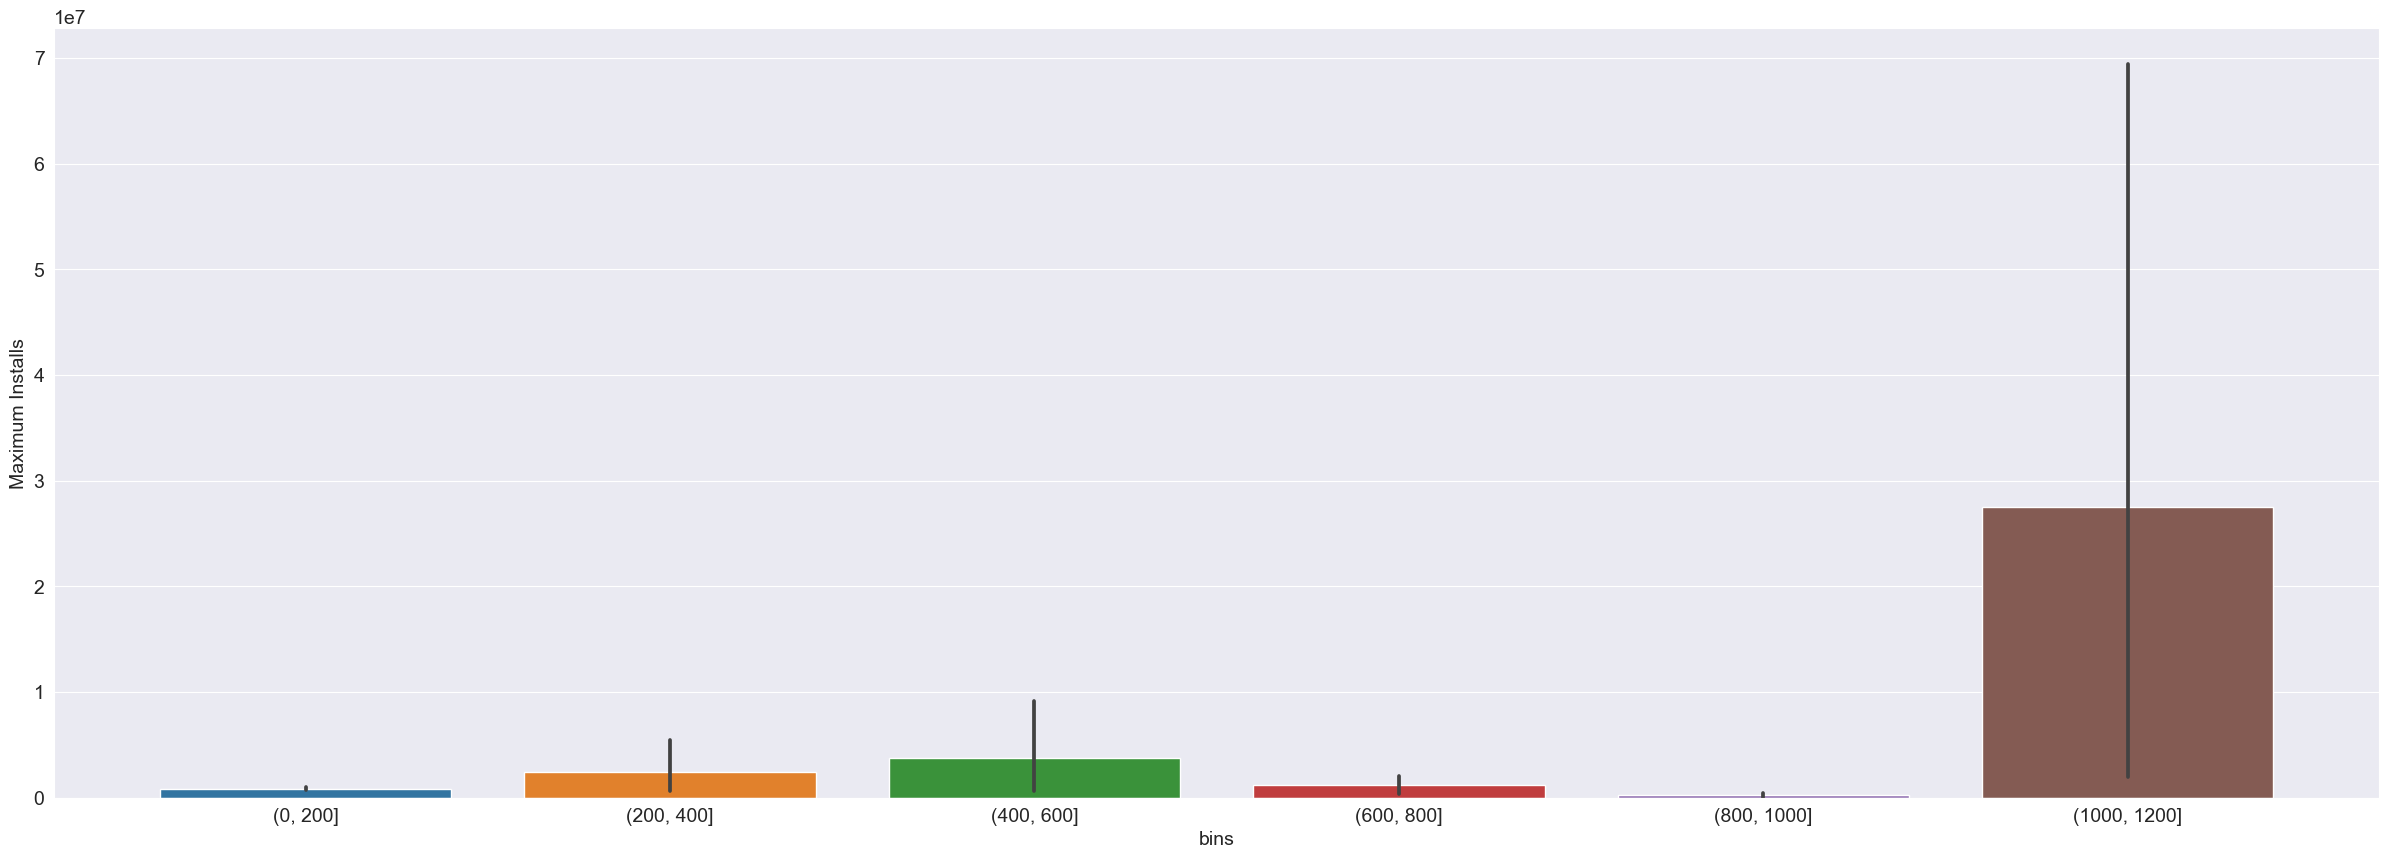

In [59]:
import seaborn as sns
plt.figure(figsize=[30, 10])
sns.barplot(data=dataset_role_playing, x="bins", y="Maximum Installs")
plt.plot()

Here we see that in the Role Playing category, the size range with most installs is 1000-1200

### 2) Predict the Rating of an app 

#### Experimenting Various Regression Models

##### Linear Regression

In [60]:
X = dataset.drop(['Category', 'Content Rating', 'Rating'], axis=1)
y = dataset['Rating']
print(X.shape)
#print(type(X), type(encoded_category))
#X = pd.concat([X, encoded_category, encoded_content_rating], axis=1).reindex(dataset.index)
#X = pd.concat([X, encoded_category], axis=1, ignore_index=True)
print(X.shape)

(2227575, 13)
(2227575, 13)


In [61]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

#StratifiedShuffleSplit can be used to make sure that all items of a category do not get randomly pushe into either the training or test set

# split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 41)
# for train_index,val_index in split.split(dataset, dataset[["Category"]]):
#     strat_train_set = dataset.loc[train_index]
#     strat_val_set = dataset.loc[val_index]
# plt.subplot(1,2,1)
# strat_train_set["Maximum Installs"].hist()
# strat_train_set["Category"].hist()

# plt.subplot(1,2,2)
# strat_val_set["Maximum Installs"].hist()
# strat_val_set["Category"].hist()

# plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=57,)
print(X_train.shape)
print(y_test.shape)

(1336545, 13)
(891030,)


In [62]:
X_train

Rating Count  Installs  Maximum Installs  Free  Price  Size  \
883778            0.0        50                86     1    0.0   6.0   
1857537          10.0      1000              2208     1    0.0  15.0   
2280278          18.0      5000              7040     1    0.0   4.9   
1149085           6.0       100               460     1    0.0   8.2   
899649            7.0      1000              4350     1    0.0   8.4   
...               ...       ...               ...   ...    ...   ...   
632565            0.0       100               137     1    0.0  30.0   
1317609           0.0       100               127     1    0.0   4.4   
1051572        2621.0    100000            201430     1    0.0   2.5   
37792             5.0       100               415     1    0.0   2.5   
1942556           0.0        10                28     1    0.0  22.0   

         Minimum Android  Ad Supported  In App Purchases  Editors Choice  \
883778               4.0             0                 0               0   
1857537              2.3             1                 1               0   
2280278              0.0             1                 0               0   
1149085              2.3             0                 0               0   
899649               4.1             1                 0               0   
...                  ...           ...               ...             ...   
632565               4.1             1                 0               0   
1317609              4.4             1                 0               0   
1051572              3.0             0                 0               0   
37792                2.3             1                 0               0   
1942556              5.0             0                 0               0   

         has_free_in_app_name  no_of_characters_in_app_name  \
883778                      0                          27.0   
1857537                     0                          21.0   
2280278                     0                          30.0   
1149085                     0                          10.0   
899649                      0                          28.0   
...                       ...                           ...   
632565                      0                          24.0   
1317609                     0                          15.0   
1051572                     0                          10.0   
37792                       0                          19.0   
1942556                     0                          31.0   

         released_within_one_year  
883778                          0  
1857537                         0  
2280278                         0  
1149085                         0  
899649                          1  
...                           ...  
632565                          1  
1317609                         0  
1051572                         0  
37792                           0  
1942556                         1  

[1336545 rows x 13 columns]

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression(normalize = True,)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


C:\Users\Sanath Davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
linear_reg_mean_square = mean_squared_error(y_test, y_pred)
linear_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)
print(linear_reg_mean_square, linear_reg_mean_absolute_percentage)


4.122362758933071 4233744397222725.0


In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.072517739742337

##### Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

random_forest_reg_mean_square = mean_squared_error(y_test, y_pred, squared=False)
random_forest_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)

print(random_forest_reg_mean_square, random_forest_reg_mean_absolute_percentage)

0.48210666691721804 0.07835960473029557


In [67]:
r2_score(y_test, y_pred)

0.9477067444268631

##### Bayesian ARD regression.

In [68]:
from sklearn import linear_model
clf = linear_model.ARDRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ard__reg_mean_square = mean_squared_error(y_test, y_pred, squared=False)
ard_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)

print(ard__reg_mean_square, ard_reg_mean_absolute_percentage)

2.034831183288163 4254312976987088.5


In [69]:
r2_score(y_test, y_pred)

0.06842854062056969

##### Bayesian ridge regression.

In [70]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ridge_reg_mean_square = mean_squared_error(y_test, y_pred, squared=False)
ridge_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)

print(ridge_reg_mean_square, ridge_reg_mean_absolute_percentage)

2.0303599336193763 4233786400255223.0


In [71]:
r2_score(y_test, y_pred)

0.0725180319761779

##### Linear SVM Regression

In [72]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
regr = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=0, tol=1e-5))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

linear_svm_reg_mean_square = mean_squared_error(y_test, y_pred, squared=False)
linear_svm_reg_mean_square_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)

print(linear_svm_reg_mean_square, linear_svm_reg_mean_square_mean_absolute_percentage)

2.1562857261124124 4033036119499825.0


C:\Users\Sanath Davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##### Epsilon-Support Vector Regression.

In [73]:
#takes too long

# from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# regr.fit(X_train, y_train)

# y_pred = regr.predict(X_test)

# eplsilon_reg_mean_square = mean_squared_error(y_test, y_pred, squared=False)
# eplsilon_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)

# print(eplsilon_reg_mean_square, eplsilon_reg_mean_absolute_percentage)

#### Trying more Ensemble Methods other than Random Forest

##### 1) Bagging Regressor (Bagging)

In [74]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

X_test1 = X_test.head(10000)
X_train1 = X_train.head(10000)
y_test1 = y_test.head(10000)
y_train1 = y_train.head(10000)

regr = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0).fit(X_train1, y_train1)
y_pred = regr.predict(X_test1)

linear_svm_reg_mean_square = mean_squared_error(y_test1, y_pred, squared=False)
linear_svm_reg_mean_square_mean_absolute_percentage = mean_absolute_percentage_error(y_test1, y_pred)

print(linear_svm_reg_mean_square, linear_svm_reg_mean_square_mean_absolute_percentage)

2.0840400557714367 5121046823101658.0


##### 2) XG Boost Regressor (Boosting)

Code sampled from https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663 

In [75]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = model.score(X_train, y_train)
print('Training Score:', score)

score = model.score(X_test, y_test)
print('Testing Score:', score)

output = pd.DataFrame({'Predicted':y_pred})

xg_reg_mean_square = mean_squared_error(y_test, y_pred, squared=False)
xg_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)

print("mean Square: ", xg_reg_mean_square)
print("mean absolute percentage error: ", xg_reg_mean_absolute_percentage)

Training Score: 0.9553094268839137
Testing Score: 0.9544036245694779
mean Square:  0.4501792337603062
mean absolute percentage error:  10671825510858.094


##### 3) Voting Regressor(Voting)

In [76]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()

er = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])
er.fit(X_train1, y_train1)
er.predict(X_test1)
y_pred = model.predict(X_test1)

xg_reg_mean_square = mean_squared_error(y_test1, y_pred, squared=False)
xg_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test1, y_pred)

print("mean Square: ", xg_reg_mean_square)
print("mean absolute percentage error: ", xg_reg_mean_absolute_percentage)

mean Square:  0.45398075555298584
mean absolute percentage error:  10448593663074.377


#### Hyper Parameter Tuning

#####  Randomised Search on Random Forest Regressor

Code taken from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [77]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [78]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train1, y_train1)

print(rf_random.best_params_)

y_pred = rf_random.predict(X_test1)

random_forest_reg_mean_square = mean_squared_error(y_test1, y_pred, squared=False)
random_forest_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test1, y_pred)

print(random_forest_reg_mean_square, random_forest_reg_mean_absolute_percentage)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Sanath Davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
0.46667506375858425 0.07512035366571654


#####  Grid Search on Support Vector Regressor

Code taken from https://machinelearninghd.com/sklearn-svm-starter-guide/

In [79]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR,LinearSVR
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [80]:
# # Kernel Selection
# regressors = [
#              SVR(kernel='linear'),
#              SVR(kernel='poly'),
#              SVR(kernel='rbf'),
#              SVR(kernel='sigmoid')]

# head = 5
# for model in regressors[:head]:
#     model.fit(X_train1, y_train1)
#     y_pred = model.predict(X_test1)  
#     print(model)
#     print("\tExplained variance:", explained_variance_score(y_test1, y_pred))
#     print("\tMean absolute error:", mean_absolute_error(y_test1, y_pred))
#     print("\tR2 score:", r2_score(y_test1, y_pred))
#     print()

In [81]:
param_grid={"C": [1e0, 1e1, 1e2, 1e3],
            "gamma": np.logspace(-2, 2, 5)}

#define model
model = SVR(kernel = 'rbf',gamma=0.1)

#define search
search = GridSearchCV(model, param_grid, scoring='r2',n_jobs=-1,cv=5)

#execute search
result = search.fit(X_train1, y_train1)

#summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.72654028528053
Best Hyperparameters: {'C': 10.0, 'gamma': 0.01}


In [82]:
#using the best parameters

y_pred = search.predict(X_test1)

linear_svm_reg_mean_square = mean_squared_error(y_test1, y_pred, squared=False)
linear_svm_reg_mean_square_mean_absolute_percentage = mean_absolute_percentage_error(y_test1, y_pred)

print(linear_svm_reg_mean_square, linear_svm_reg_mean_square_mean_absolute_percentage)

1.0630136216189396 1167797387153620.5


#####  Random Search on XG Boost Regressor

Code taken from https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

In [83]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X_train1, y_train1)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.47158731688952643


Now trying XGboost again with the best parameters obtained from grid search

In [84]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model = clf

y_pred = model.predict(X_test1)

score = model.score(X_train1, y_train1)
print('Training Score:', score)

score = model.score(X_test1, y_test1)
print('Testing Score:', score)

output = pd.DataFrame({'Predicted':y_pred})

xg_reg_mean_square = mean_squared_error(y_test1, y_pred, squared=False)
xg_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test1, y_pred)

print("mean Square: ", xg_reg_mean_square)
print("mean absolute percentage error: ", xg_reg_mean_absolute_percentage)

mse = mean_squared_error(y_test1, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

Training Score: -0.19234360238673864
Testing Score: -0.22093174085111728
mean Square:  0.47003376564999805
mean absolute percentage error:  118319971561819.39
RMSE: 0.47


### 3) Predict the Number of Installs an app 

#### Experimenting Various Regression Models

##### Linear Regression

In [85]:
X = dataset.drop(['Maximum Installs', 'Category', 'Content Rating'], axis=1)
y = dataset['Maximum Installs']
print(X.shape)
print(type(X), type(encoded_category))
#X = pd.concat([X, encoded_category, encoded_content_rating], axis=1).reindex(dataset.index)
#X = pd.concat([X, encoded_category], axis=1, ignore_index=True)
print(X.shape)

(2227575, 13)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(2227575, 13)


In [86]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

#StratifiedShuffleSplit can be used to make sure that all items of a category do not get randomly pushe into either the training or test set

# split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 41)
# for train_index,val_index in split.split(dataset, dataset[["Category"]]):
#     strat_train_set = dataset.loc[train_index]
#     strat_val_set = dataset.loc[val_index]
# plt.subplot(1,2,1)
# strat_train_set["Maximum Installs"].hist()
# strat_train_set["Category"].hist()

# plt.subplot(1,2,2)
# strat_val_set["Maximum Installs"].hist()
# strat_val_set["Category"].hist()

# plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=57,)
print(X_train.shape)
print(y_test.shape)

(1336545, 13)
(891030,)


In [87]:
X_train

Rating  Rating Count  Installs  Free  Price  Size  Minimum Android  \
883778      0.0           0.0        50     1    0.0   6.0              4.0   
1857537     3.1          10.0      1000     1    0.0  15.0              2.3   
2280278     4.3          18.0      5000     1    0.0   4.9              0.0   
1149085     5.0           6.0       100     1    0.0   8.2              2.3   
899649      4.3           7.0      1000     1    0.0   8.4              4.1   
...         ...           ...       ...   ...    ...   ...              ...   
632565      0.0           0.0       100     1    0.0  30.0              4.1   
1317609     0.0           0.0       100     1    0.0   4.4              4.4   
1051572     4.2        2621.0    100000     1    0.0   2.5              3.0   
37792       3.8           5.0       100     1    0.0   2.5              2.3   
1942556     0.0           0.0        10     1    0.0  22.0              5.0   

         Ad Supported  In App Purchases  Editors Choice  has_free_in_app_name  \
883778              0                 0               0                     0   
1857537             1                 1               0                     0   
2280278             1                 0               0                     0   
1149085             0                 0               0                     0   
899649              1                 0               0                     0   
...               ...               ...             ...                   ...   
632565              1                 0               0                     0   
1317609             1                 0               0                     0   
1051572             0                 0               0                     0   
37792               1                 0               0                     0   
1942556             0                 0               0                     0   

         no_of_characters_in_app_name  released_within_one_year  
883778                           27.0                         0  
1857537                          21.0                         0  
2280278                          30.0                         0  
1149085                          10.0                         0  
899649                           28.0                         1  
...                               ...                       ...  
632565                           24.0                         1  
1317609                          15.0                         0  
1051572                          10.0                         0  
37792                            19.0                         0  
1942556                          31.0                         1  

[1336545 rows x 13 columns]

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression(normalize = True,)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


C:\Users\Sanath Davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
linear_reg_mean_square = mean_squared_error(y_test, y_pred)
linear_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)
print(linear_reg_mean_square, linear_reg_mean_absolute_percentage)


2773727630902.7476 3.009705342047214e+17


In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9189797479844456

##### Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

random_forest_reg_mean_square = mean_squared_error(y_test, y_pred, squared=False)
random_forest_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)

print(random_forest_reg_mean_square, random_forest_reg_mean_absolute_percentage)

2311880.7551028165 3.0551874354082483e+18


##### Bayesian ARD regression.


In [92]:
from sklearn import linear_model
clf = linear_model.ARDRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ard__reg_mean_square = mean_squared_error(y_test, y_pred, squared=False)
ard_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)

print(ard__reg_mean_square, ard_reg_mean_absolute_percentage)

1665417.1355366108 2.5647193764331354e+17


##### Bayesian ridge regression.

In [93]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ridge_reg_mean_square = mean_squared_error(y_test, y_pred, squared=False)
ridge_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)

print(ridge_reg_mean_square, ridge_reg_mean_absolute_percentage)

1665860.4385706503 3.521821909928244e+17


##### Epsilon-Support Vector Regression.

In [94]:
#takes too long

# from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# regr.fit(X_train, y_train)

# y_pred = regr.predict(X_test)

# eplsilon_reg_mean_square = mean_squared_error(y_test, y_pred, squared=False)
# eplsilon_reg_mean_absolute_percentage = mean_absolute_percentage_error(y_test, y_pred)

# print(eplsilon_reg_mean_square, eplsilon_reg_mean_absolute_percentage)